In [69]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.special import inv_boxcox
from src.clean_and_merge import downcast_numeric

1. What are the main features that are important to consider when picking a flat that will retain value?
    - Is it still worth to buy a HDB that is near to the city since covid?
    - What is the impact of distance to MRT?
2. What timeframe /location of data should I look at?

In [70]:
df = pd.read_csv('data/processed_data/merged_data.csv')

In [21]:
df.describe()

year_sold  floor_area_sqm  remaining_lease  lease_commence_date  \
count  916482.000000   916482.000000    916482.000000        916482.000000   
mean     2006.016671       95.717467        81.175948          1988.192619   
std         9.178919       25.838126        10.632995            10.561169   
min      1990.000000       28.000000        41.000000          1966.000000   
25%      1999.000000       73.000000        74.000000          1981.000000   
50%      2005.000000       93.000000        83.000000          1986.000000   
75%      2013.000000      113.000000        90.000000          1996.000000   
max      2024.000000      307.000000       101.000000          2022.000000   

              storey  resale_price  
count  916482.000000  9.164820e+05  
mean        7.680646  3.263779e+05  
std         4.810727  1.266477e+05  
min         2.000000  1.632653e+04  
25%         5.000000  2.312925e+05  
50%         8.000000  3.070761e+05  
75%        11.000000  3.886926e+05  
max        50.000000  1.198675e+06

In [71]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916482 entries, 0 to 916481
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year_sold            916482 non-null  int64  
 1   floor_area_sqm       916482 non-null  float64
 2   remaining_lease      916482 non-null  int64  
 3   lease_commence_date  916482 non-null  int64  
 4   storey               916482 non-null  float64
 5   flat_type            916482 non-null  object 
 6   town                 916482 non-null  object 
 7   block                916482 non-null  object 
 8   street_name          916482 non-null  object 
 9   flat_model           916482 non-null  object 
 10  resale_price         916482 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 292.7 MB


In [23]:
mem = df.memory_usage(deep=True) / 1024**2
mem.apply(lambda x: '{:.2f} MB'.format(x))

Index                   0.00 MB
year_sold               6.99 MB
floor_area_sqm          6.99 MB
remaining_lease         6.99 MB
lease_commence_date     6.99 MB
storey                  6.99 MB
flat_type              48.27 MB
town                   50.72 MB
block                  45.39 MB
street_name            55.07 MB
flat_model             51.25 MB
resale_price            6.99 MB
dtype: object

In [72]:
# convert some values to category
df['flat_type'] = df['flat_type'].astype('category')
df['flat_model'] = df['flat_model'].astype('category')
df['town'] = df['town'].astype('category')

# downcast the remaining numerical values
df = downcast_numeric(df)

In [73]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916482 entries, 0 to 916481
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   year_sold            916482 non-null  int16   
 1   floor_area_sqm       916482 non-null  float32 
 2   remaining_lease      916482 non-null  int8    
 3   lease_commence_date  916482 non-null  int16   
 4   storey               916482 non-null  float32 
 5   flat_type            916482 non-null  category
 6   town                 916482 non-null  category
 7   block                916482 non-null  object  
 8   street_name          916482 non-null  object  
 9   flat_model           916482 non-null  category
 10  resale_price         916482 non-null  float64 
dtypes: category(3), float32(2), float64(1), int16(2), int8(1), object(2)
memory usage: 121.4 MB


In [37]:
mem = df.memory_usage(deep=True) / 1024**2
mem.apply(lambda x: '{:.2f} MB'.format(x))

Index                   0.00 MB
year_sold               1.75 MB
floor_area_sqm          3.50 MB
remaining_lease         0.87 MB
lease_commence_date     1.75 MB
storey                  3.50 MB
flat_type               0.87 MB
town                    0.88 MB
block                  45.39 MB
street_name            55.07 MB
flat_model              0.88 MB
resale_price            6.99 MB
built_decade            1.75 MB
sold_decade             1.75 MB
dtype: object

In [38]:
df.head()

year_sold  floor_area_sqm  remaining_lease  lease_commence_date  storey  \
0       1990            31.0               86                 1977     5.0   
1       1990            31.0               86                 1977     2.0   
2       1990            45.0               95                 1986     2.0   
3       1990            67.0               86                 1977     5.0   
4       1990            67.0               86                 1977     8.0   

  flat_type        town block       street_name      flat_model  \
0    1 ROOM  ANG MO KIO   309  ANG MO KIO AVE 1        improved   
1    1 ROOM  ANG MO KIO   309  ANG MO KIO AVE 1        improved   
2    2 ROOM  ANG MO KIO   170  ANG MO KIO AVE 4        improved   
3    3 ROOM  ANG MO KIO   212  ANG MO KIO AVE 3  new generation   
4    3 ROOM  ANG MO KIO   201  ANG MO KIO AVE 3  new generation   

    resale_price  built_decade  sold_decade  
0   32921.810700          1970         1990  
1   32921.810700          1970         1990  
2   91358.024691          1980         1990  
3  185185.185185          1970         1990  
4  148148.148148          1970         1990

# EDA

## Are flats from different decades significantly different in price?

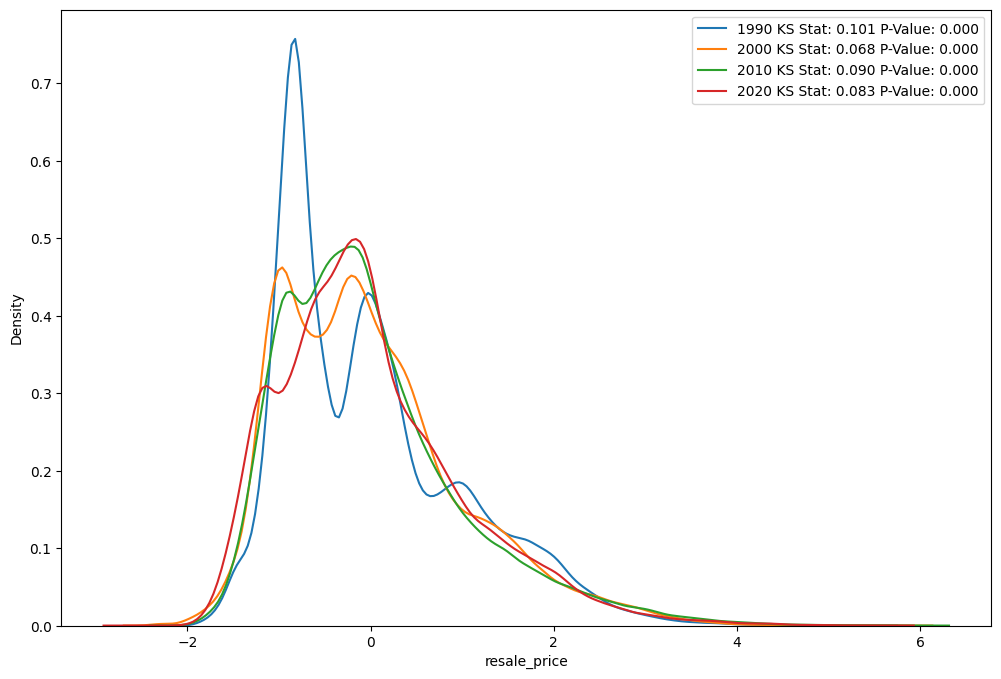

In [68]:
# Kolmogorov-Smirnov Plot of Resale Price by decade_sold
from scipy.stats import kstest
from scipy.stats import norm

df['decade_sold'] = df['year_sold'] // 10 * 10
decade_sold = df['decade_sold'].unique()
decade_sold.sort()

plt.figure(figsize=(12, 8))
for decade in decade_sold:
    data = df[df['decade_sold'] == decade]['resale_price']
    data = (data - data.mean()) / data.std()
    ks_stat, p_value = kstest(data, 'norm')
    sns.kdeplot(data, label=f'{decade} KS Stat: {ks_stat:.3f} P-Value: {p_value:.3f}')
plt.legend()

<Axes: xlabel='lease_commence_date', ylabel='resale_price'>

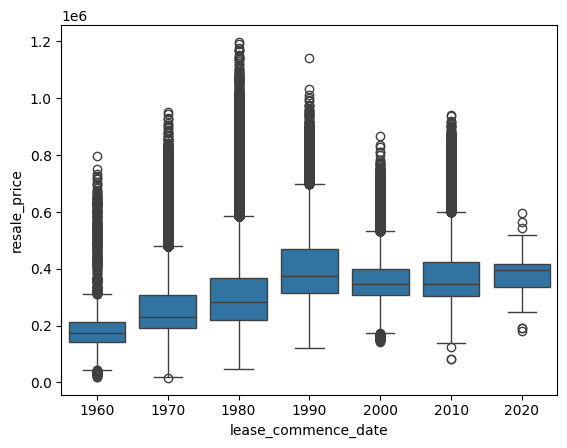

In [51]:
sns.boxplot(data=df, x=df['lease_commence_date'] // 10 * 10, y='resale_price')

<Axes: xlabel='year_sold', ylabel='resale_price'>

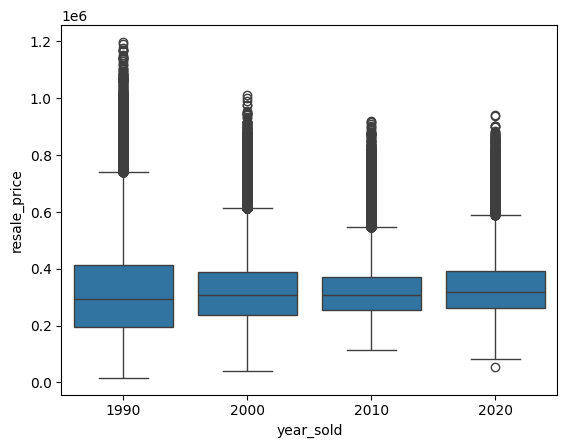

In [52]:
sns.boxplot(data=df, x=df['year_sold'] // 10 * 10, y='resale_price')

### Comparing remaining lease against resale price
Scatter plots don't work very well to summarize data if there's too much data points
- Solution 1: Bin the data points and do box plots

<Axes: xlabel='remaining_lease', ylabel='resale_price'>

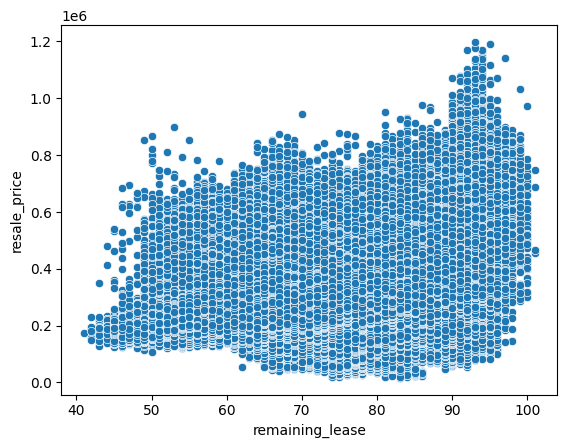

In [44]:
sns.scatterplot(data=df, x='remaining_lease', y='resale_price')

C:\Users\hurry\AppData\Local\Temp\ipykernel_28380\1903523206.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['decade_built', 'flat_type'])


Decade built: 1960
Flat type: 1 ROOM


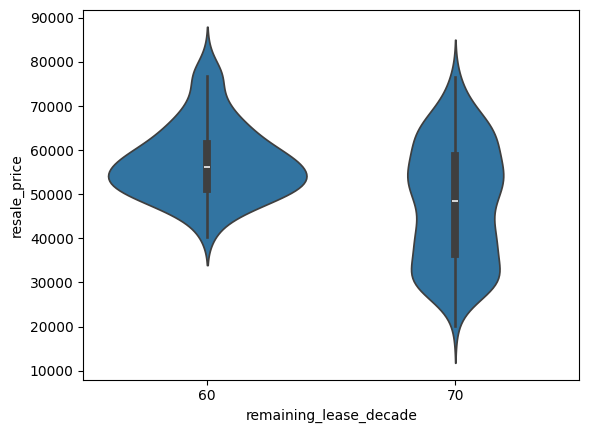

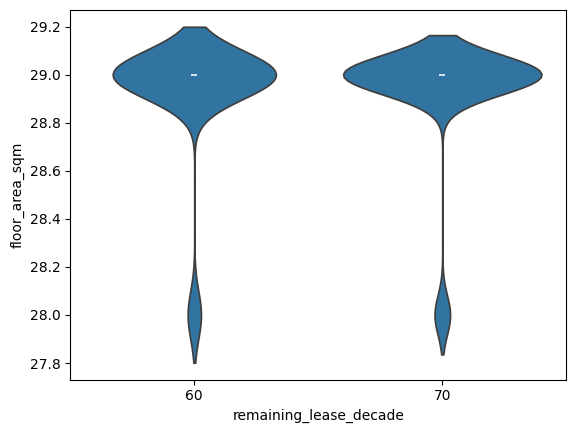

Decade built: 1960
Flat type: 2 ROOM


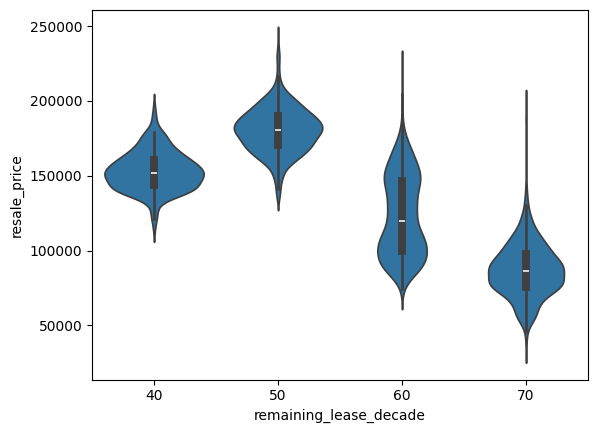

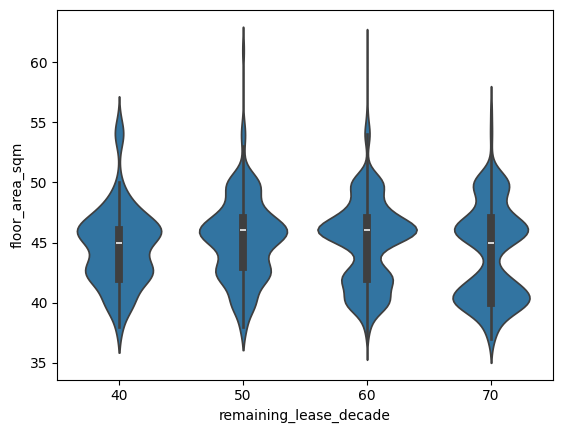

Decade built: 1960
Flat type: 3 ROOM


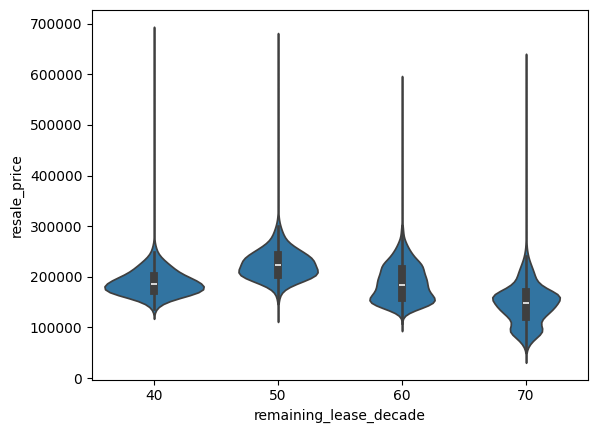

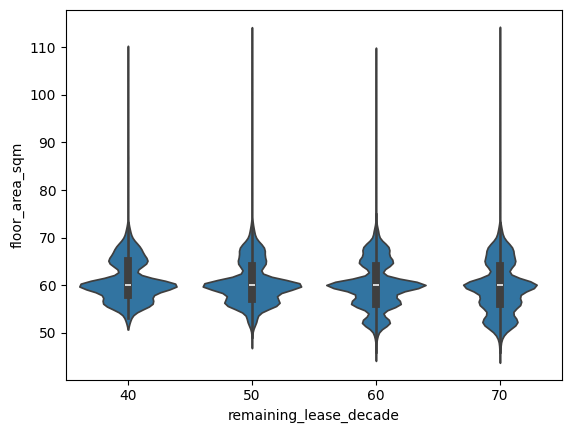

Decade built: 1960
Flat type: 4 ROOM


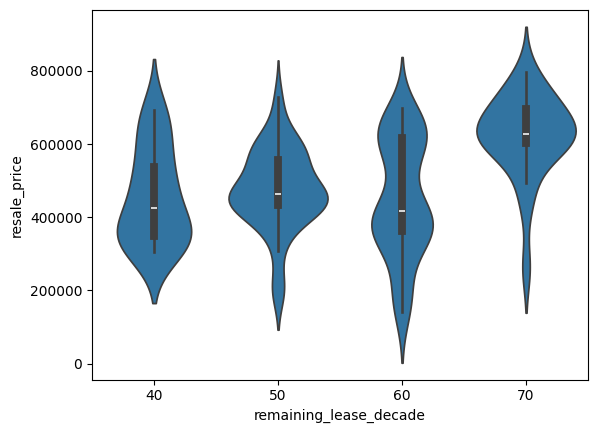

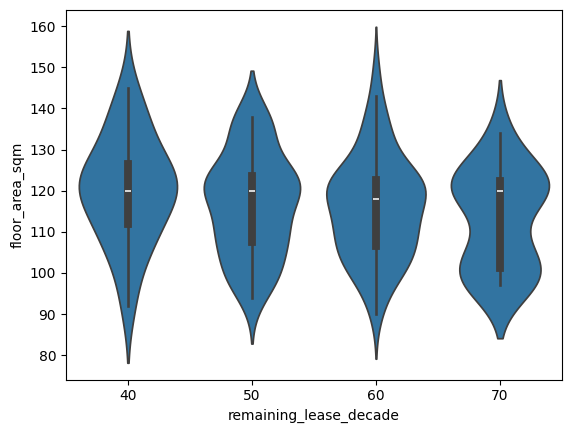

Decade built: 1960
Flat type: 5 ROOM


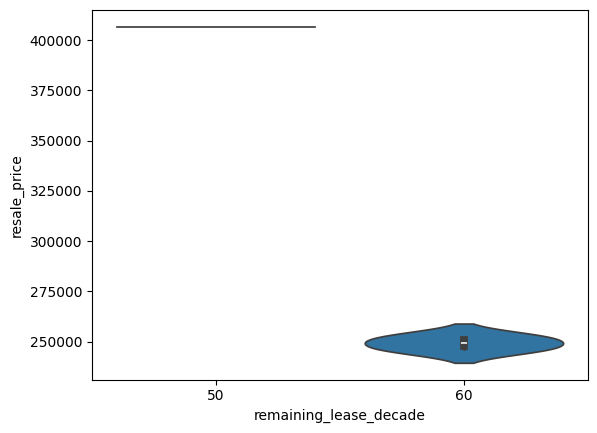

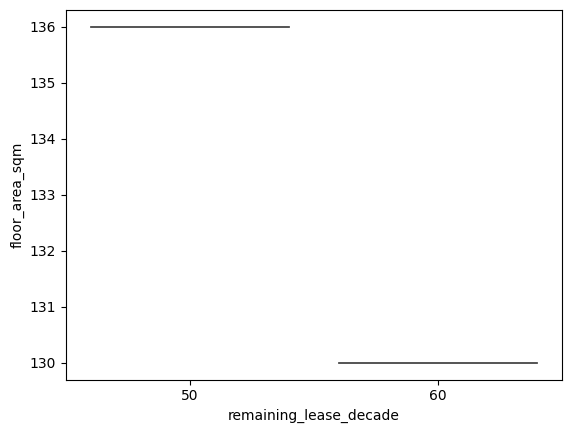

Decade built: 1970
Flat type: 1 ROOM


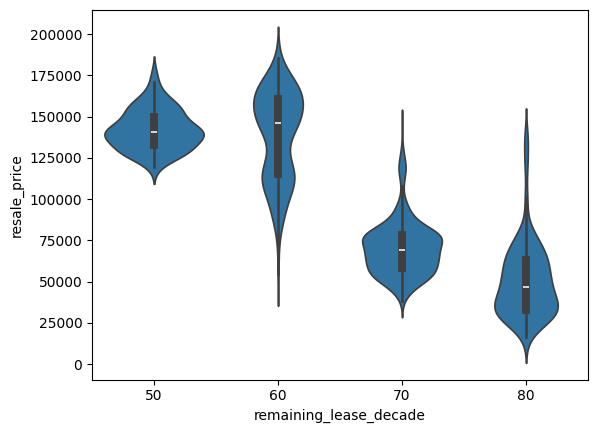

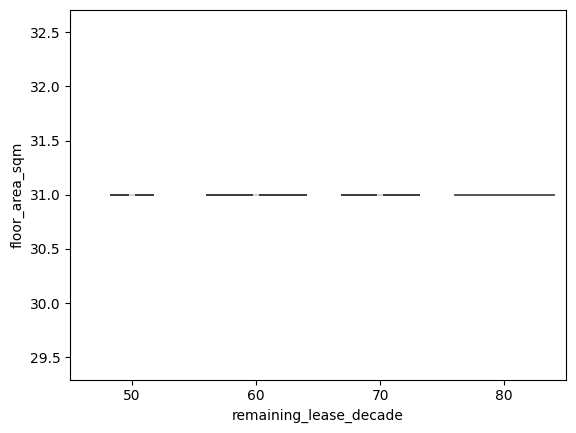

Decade built: 1970
Flat type: 2 ROOM


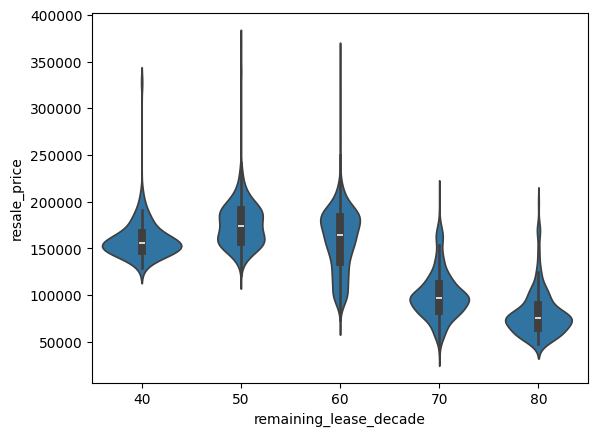

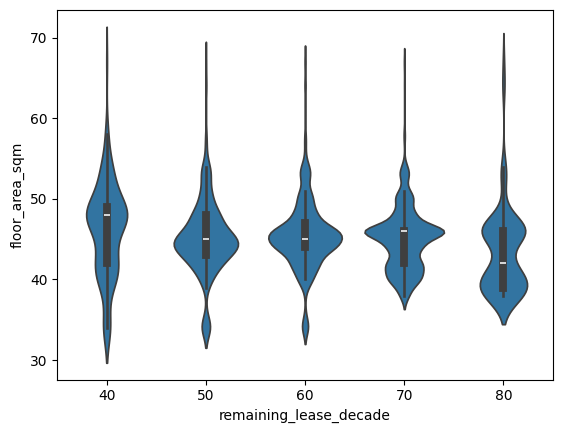

Decade built: 1970
Flat type: 3 ROOM


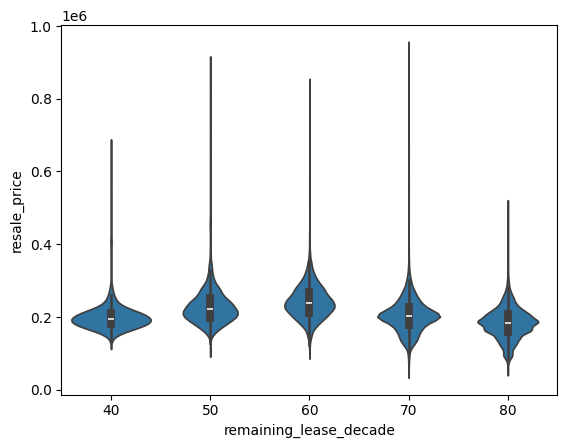

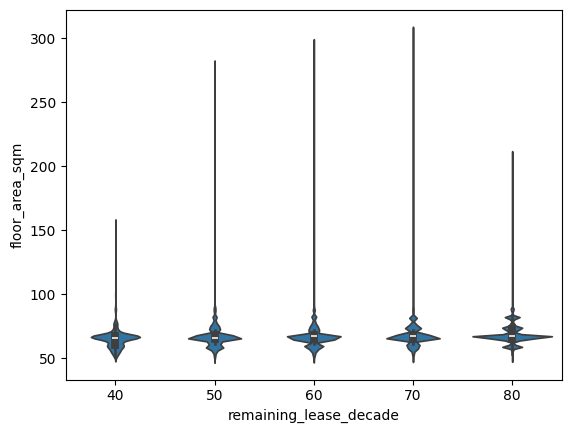

Decade built: 1970
Flat type: 4 ROOM


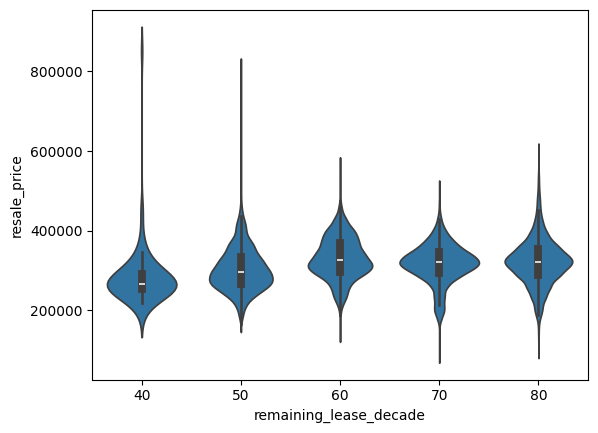

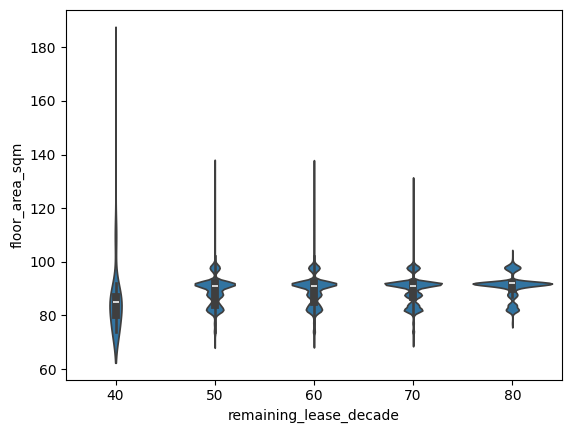

Decade built: 1970
Flat type: 5 ROOM


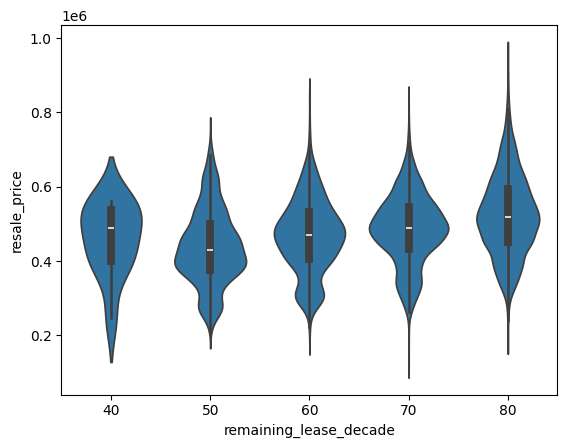

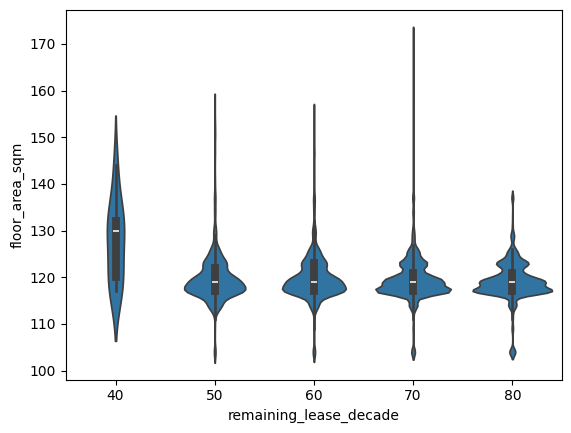

Decade built: 1970
Flat type: EXECUTIVE


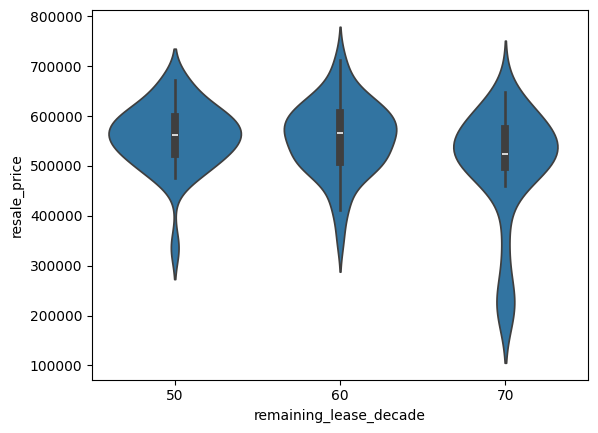

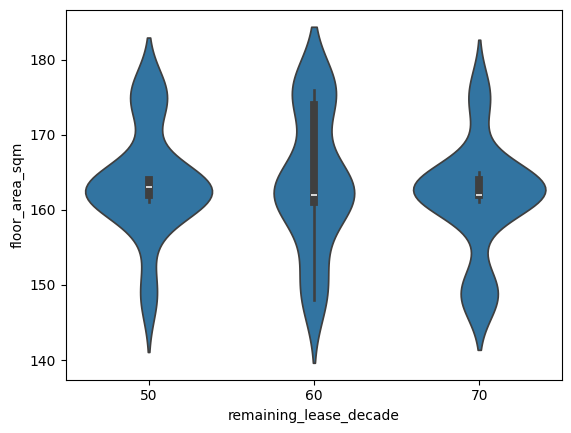

Decade built: 1980
Flat type: 2 ROOM


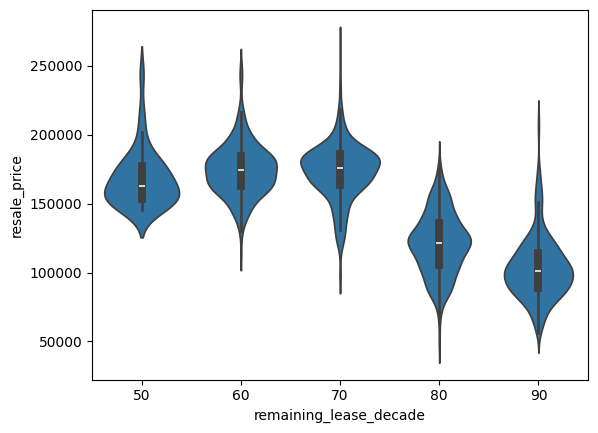

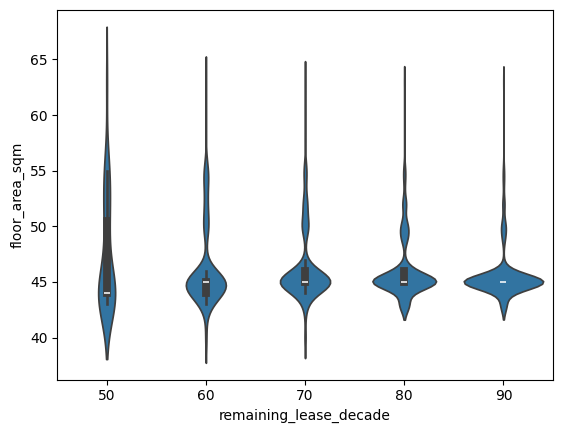

Decade built: 1980
Flat type: 3 ROOM


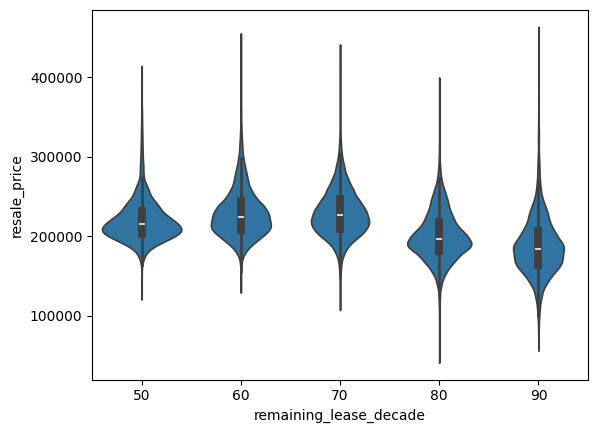

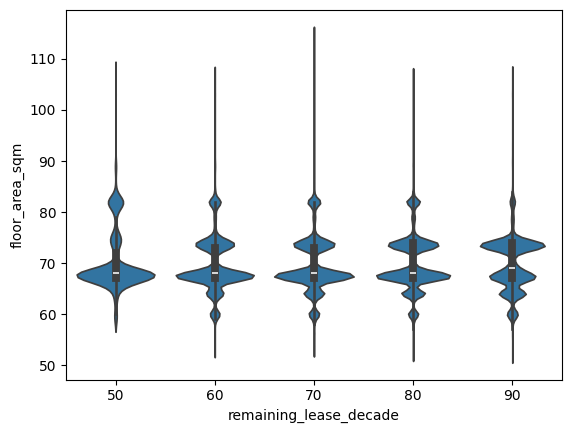

Decade built: 1980
Flat type: 4 ROOM


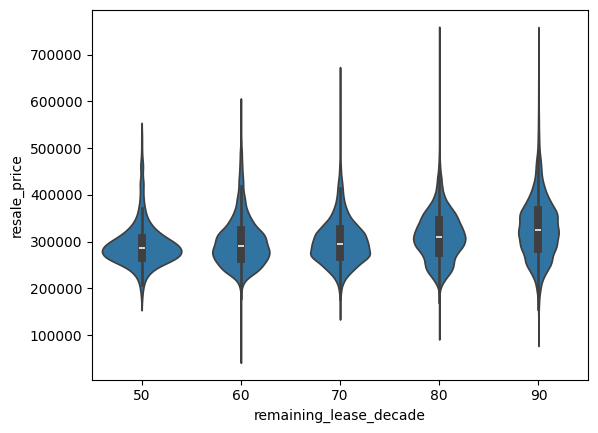

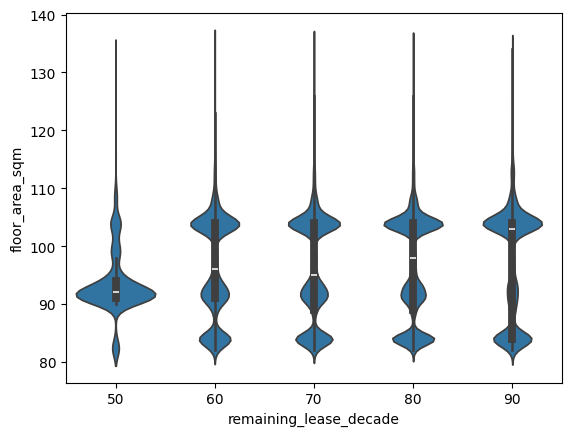

Decade built: 1980
Flat type: 5 ROOM


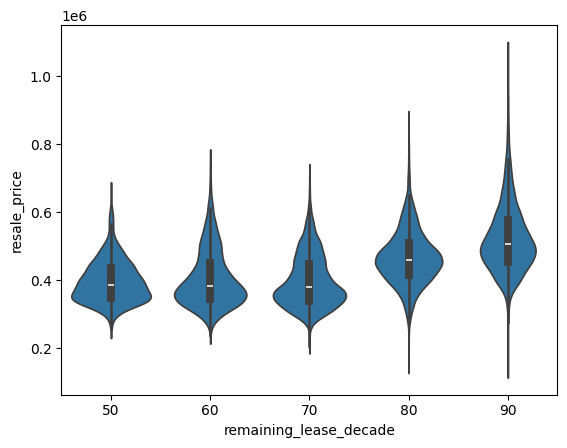

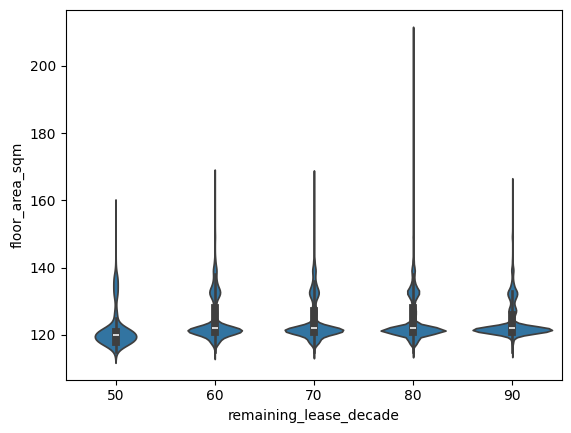

Decade built: 1980
Flat type: EXECUTIVE


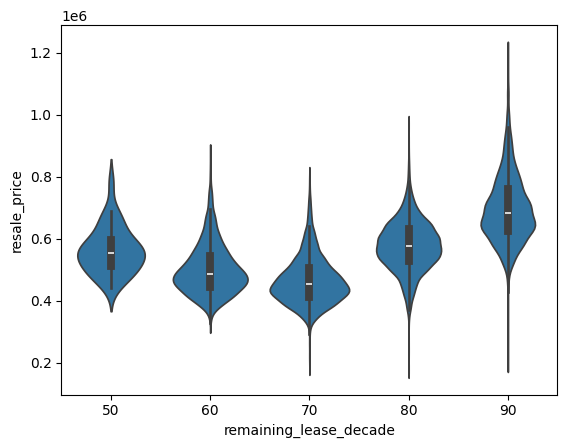

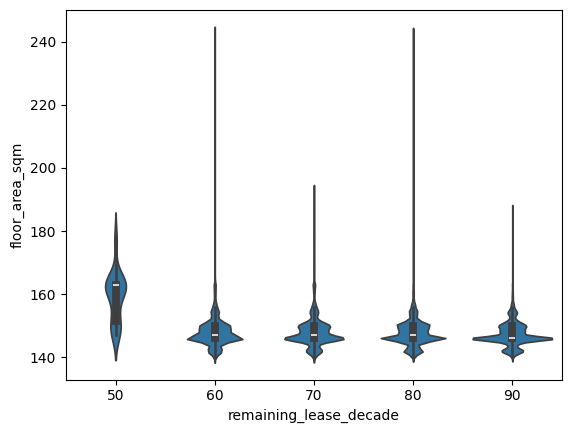

Decade built: 1980
Flat type: MULTI GENERATION


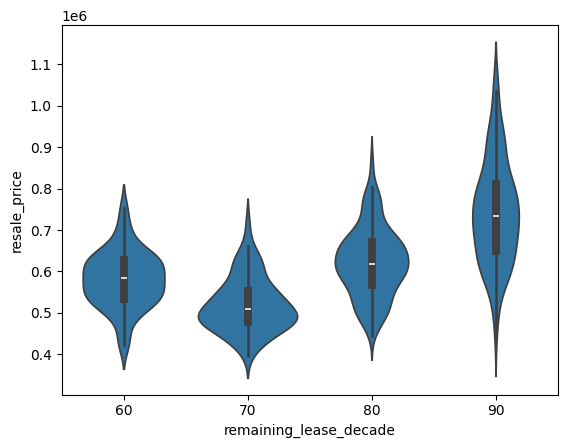

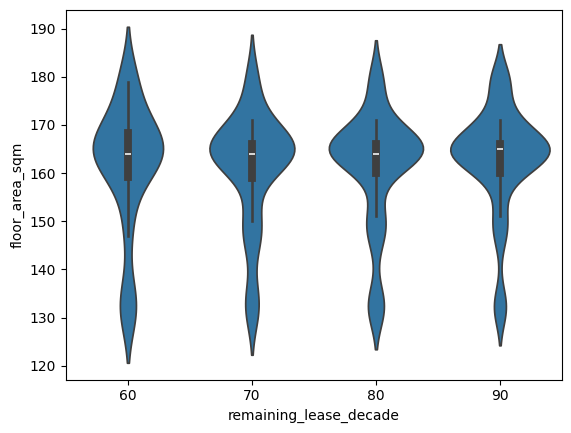

Decade built: 1990
Flat type: 2 ROOM


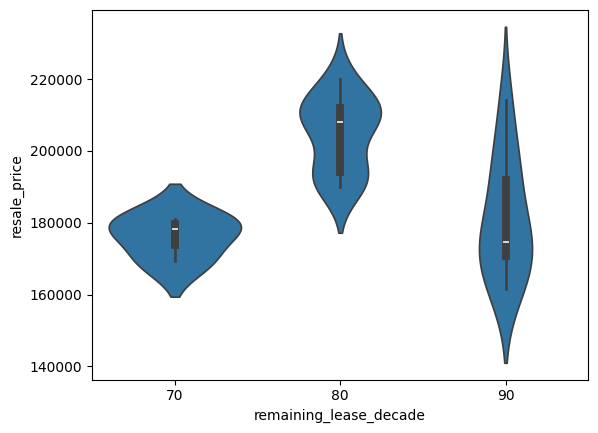

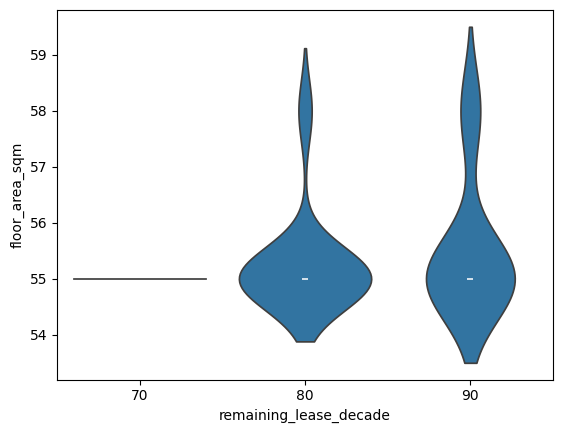

Decade built: 1990
Flat type: 3 ROOM


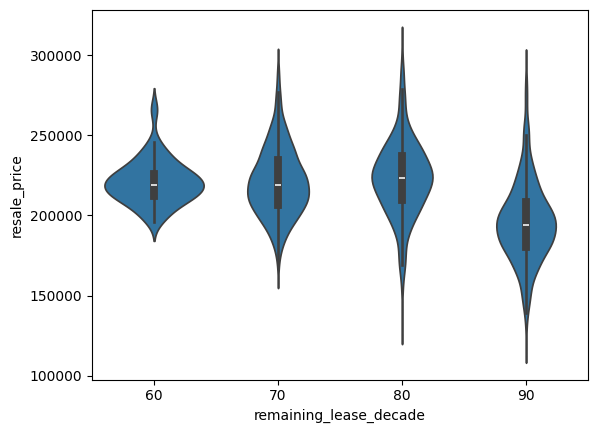

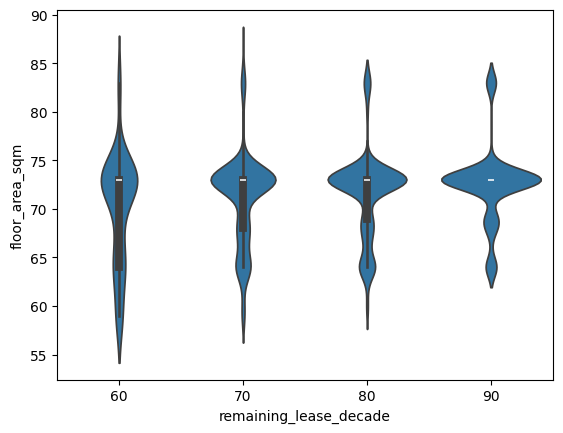

Decade built: 1990
Flat type: 4 ROOM


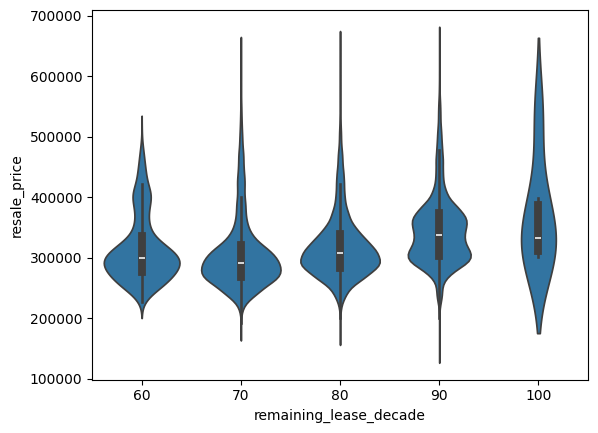

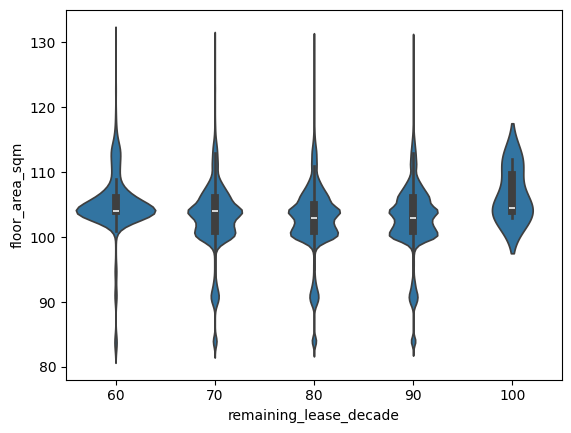

Decade built: 1990
Flat type: 5 ROOM


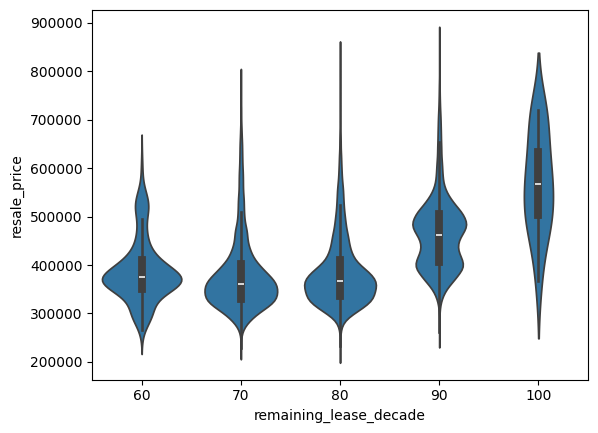

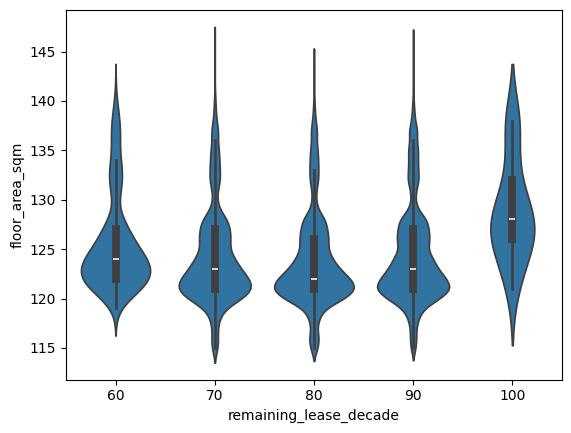

Decade built: 1990
Flat type: EXECUTIVE


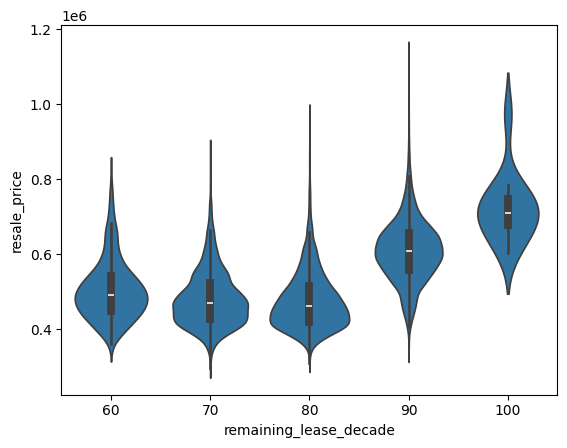

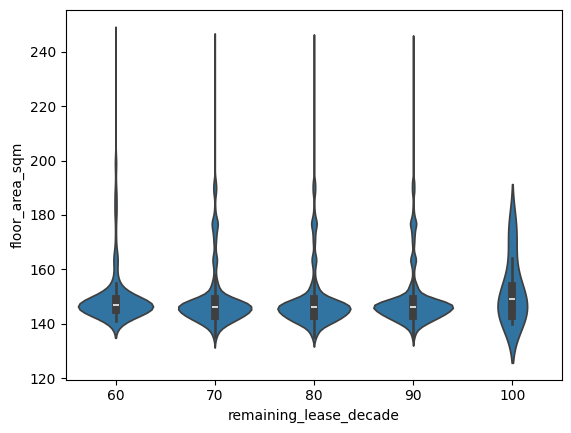

Decade built: 2000
Flat type: 2 ROOM


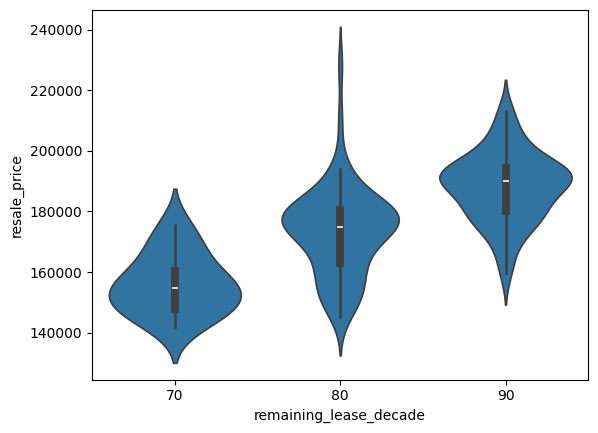

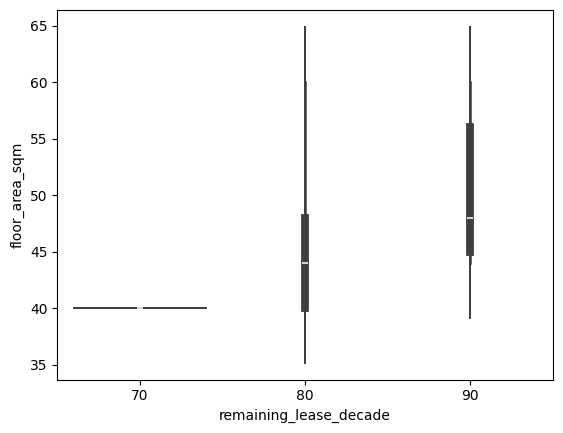

Decade built: 2000
Flat type: 3 ROOM


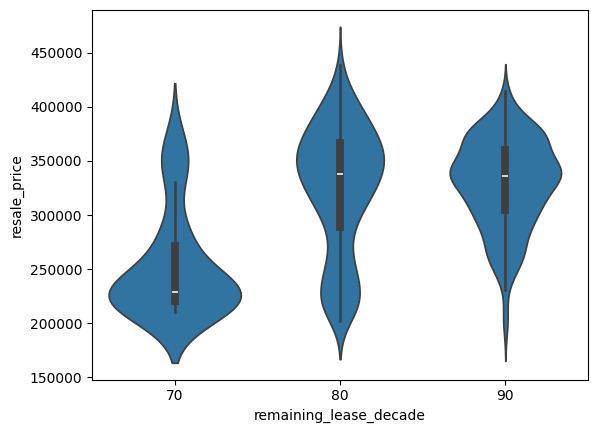

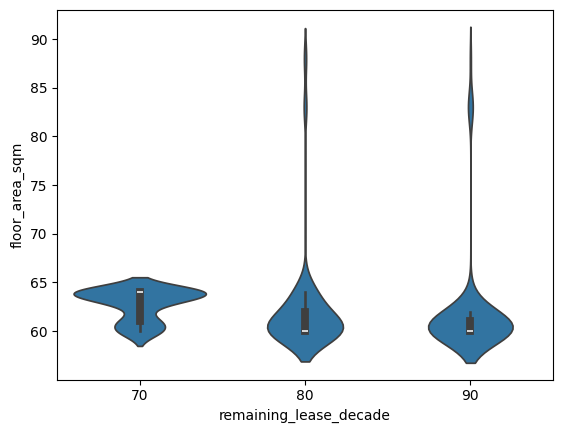

Decade built: 2000
Flat type: 4 ROOM


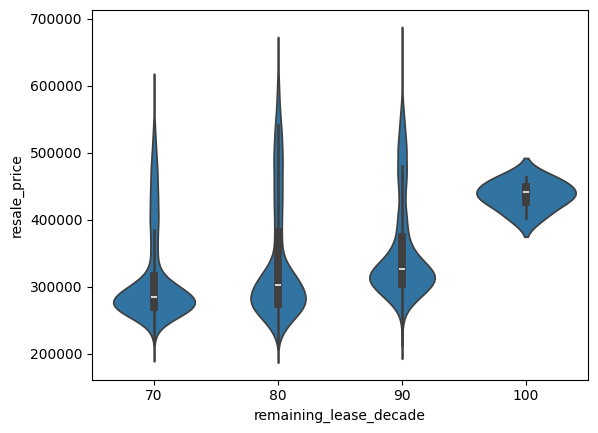

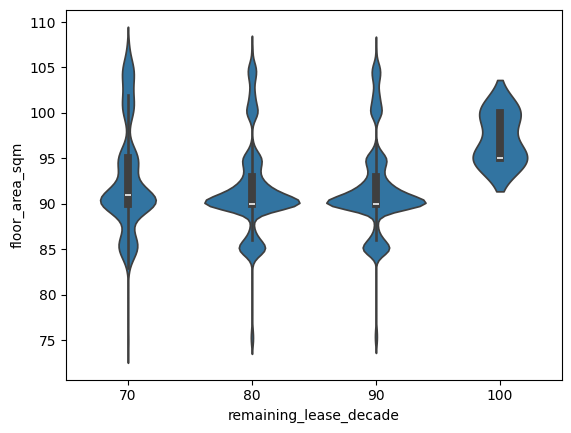

Decade built: 2000
Flat type: 5 ROOM


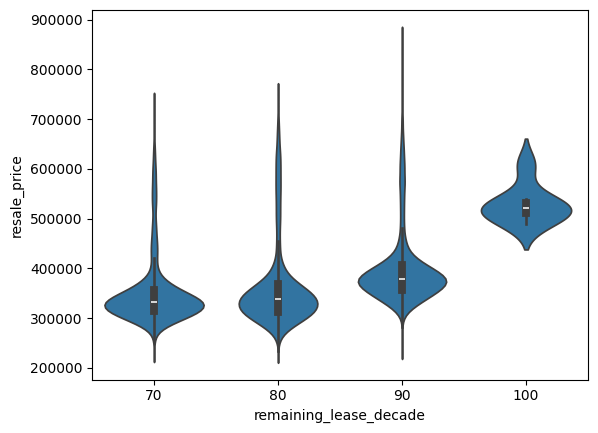

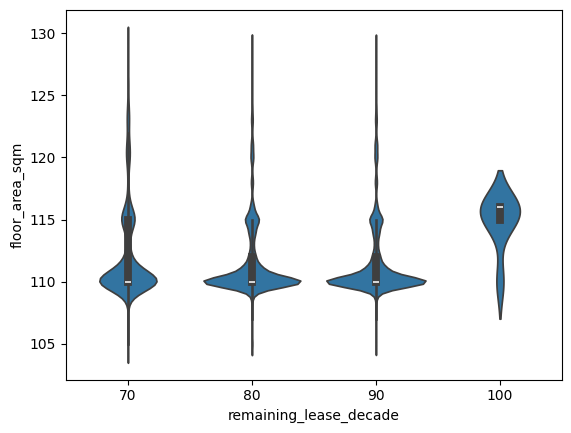

Decade built: 2000
Flat type: EXECUTIVE


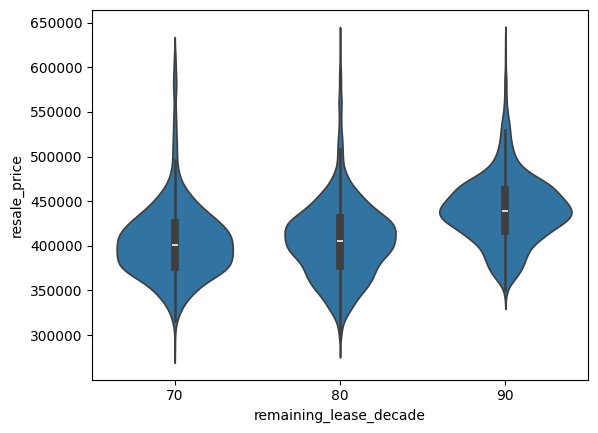

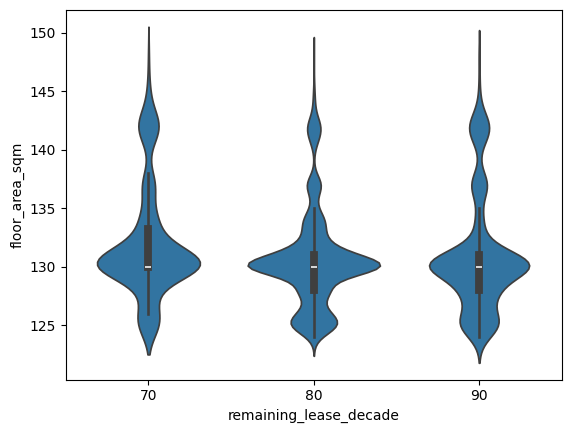

Decade built: 2010
Flat type: 2 ROOM


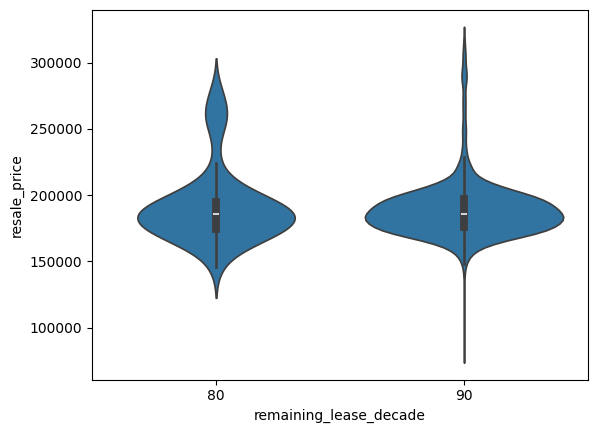

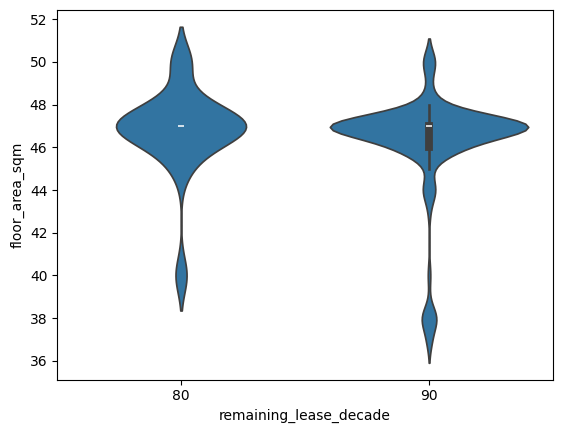

Decade built: 2010
Flat type: 3 ROOM


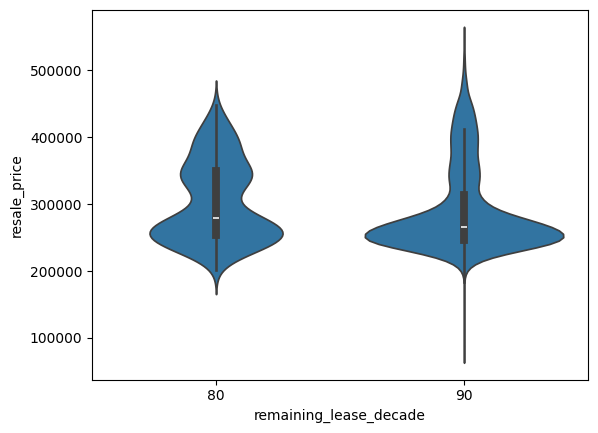

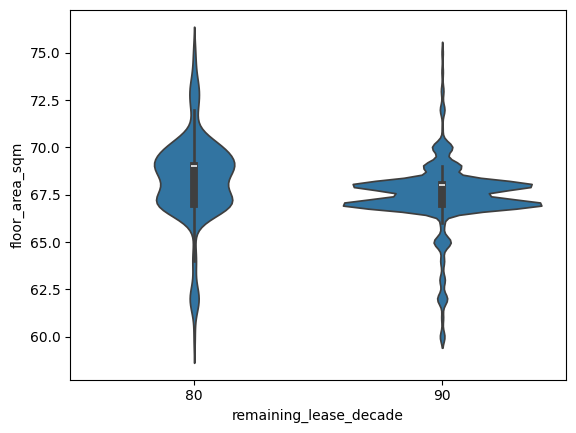

Decade built: 2010
Flat type: 4 ROOM


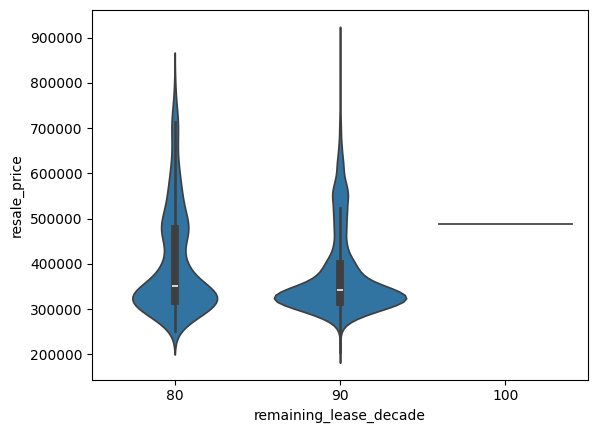

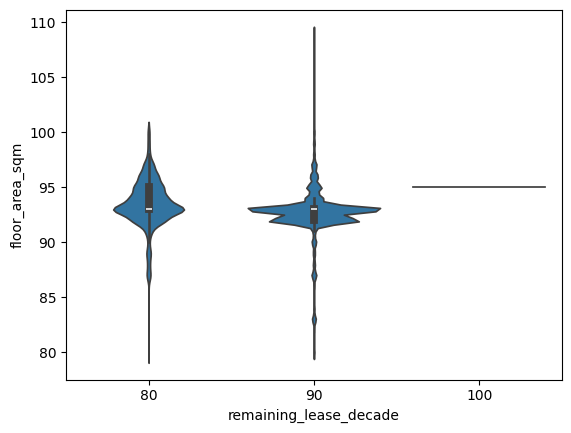

Decade built: 2010
Flat type: 5 ROOM


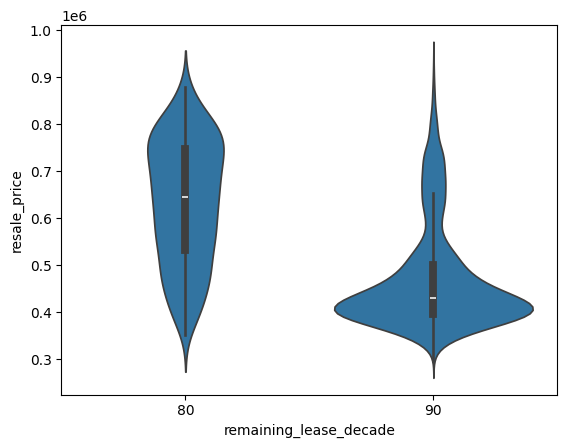

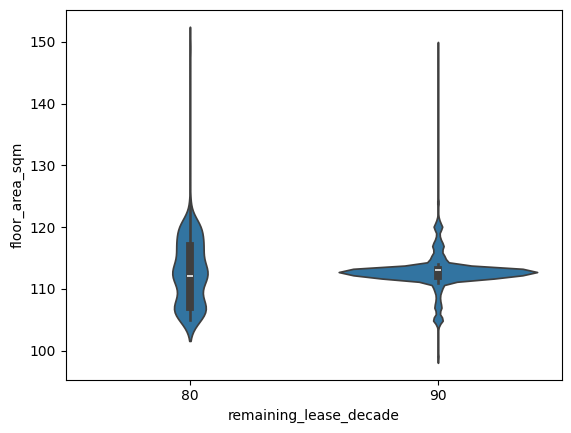

Decade built: 2020
Flat type: 2 ROOM


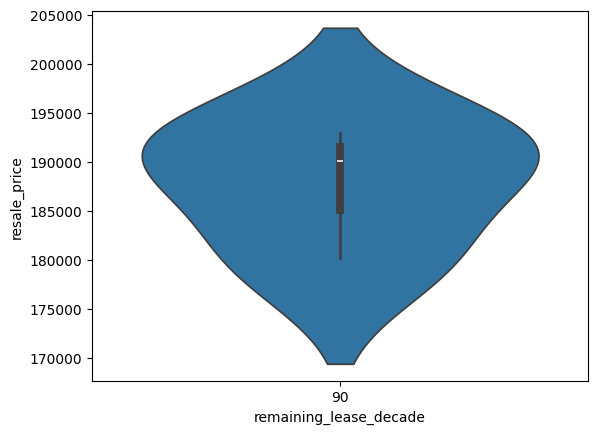

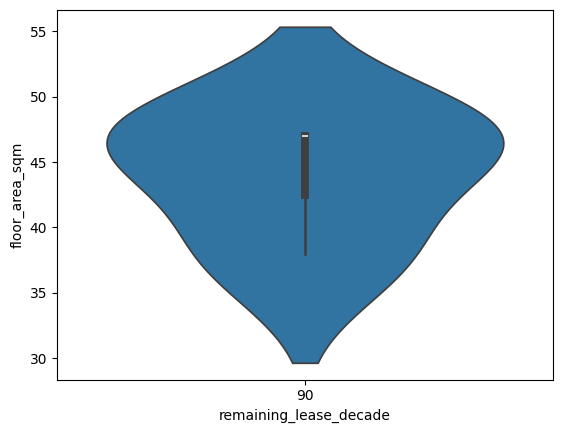

Decade built: 2020
Flat type: 3 ROOM


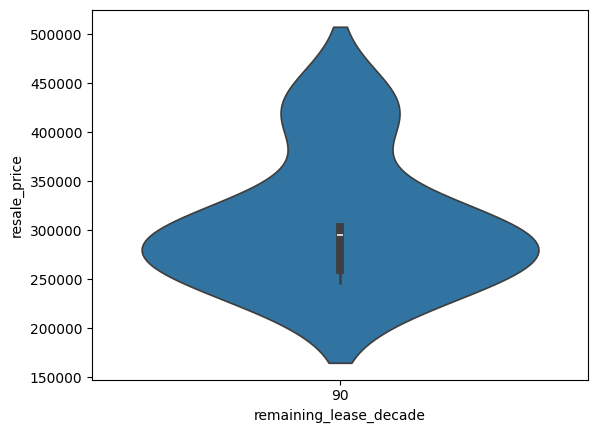

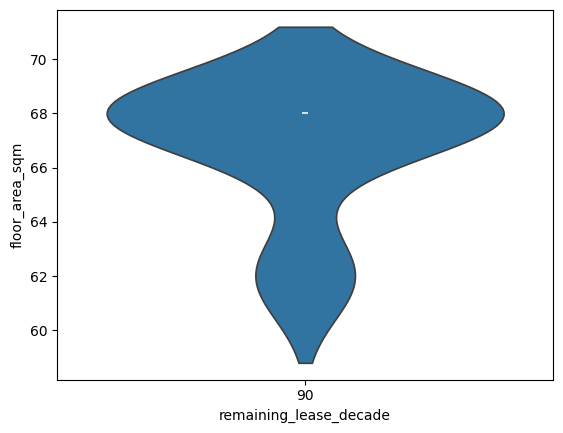

Decade built: 2020
Flat type: 4 ROOM


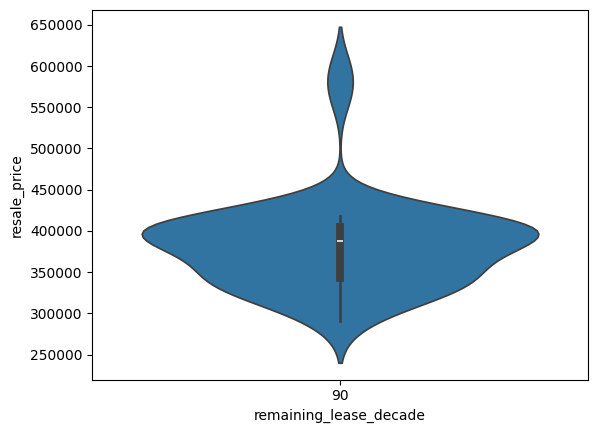

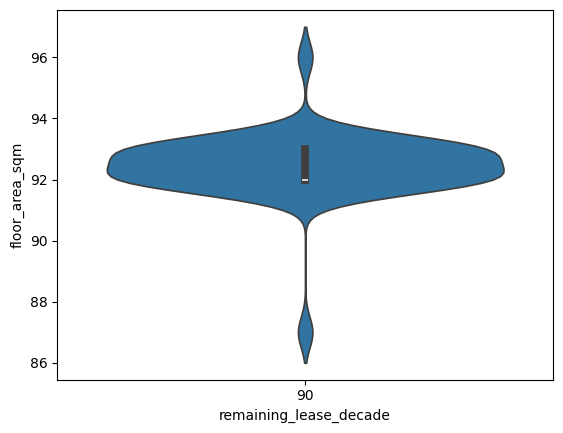

Decade built: 2020
Flat type: 5 ROOM


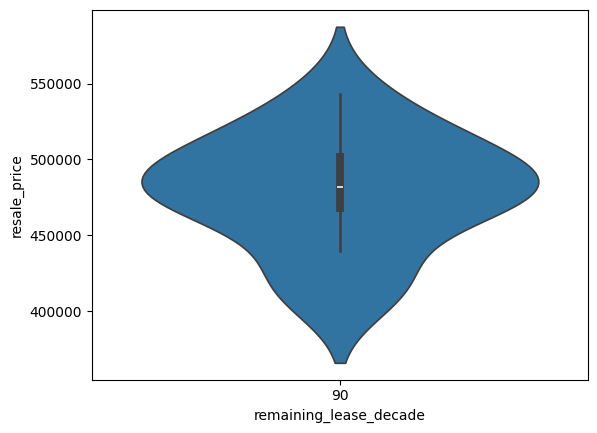

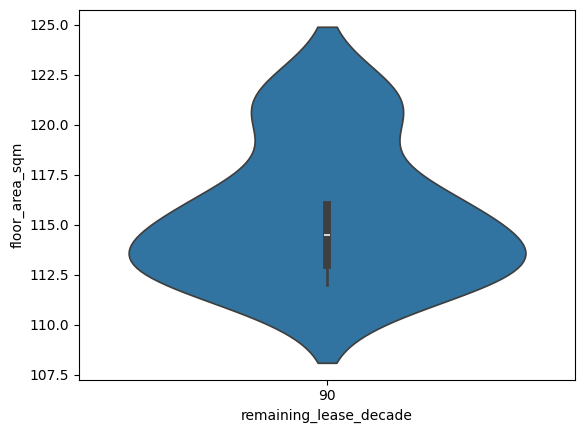

In [63]:
df['decade_built'] = df['lease_commence_date'] // 10 * 10
df['remaining_lease_decade'] = df['remaining_lease'] // 10 * 10

grouped = df.groupby(['decade_built', 'flat_type'])

for (decade, flat_type), group in grouped:
    sns.violinplot(data=group, x='remaining_lease_decade', y='resale_price')
    print(f'Decade built: {decade}')
    print(f'Flat type: {flat_type}')
    plt.show()
    sns.violinplot(data=group, x='remaining_lease_decade', y='floor_area_sqm')
    plt.show()

## flat_types
Information from: https://www.teoalida.com/singapore/hdbflattypes/
### 1 Room
1960s - Improved only
### 2 Room
- 1960s - 1970s: Standard -> Improved
- Late 1990s to present: Studio Apartment / Model A
### 3 Room


In [37]:
df['flat_type_model_count'] = df.groupby(['flat_type', 'flat_model'])['flat_type'].transform('size')
df = df[df['flat_type_model_count'] > len(df)*0.01]

C:\Users\hurry\AppData\Local\Temp\ipykernel_62496\3524560866.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['flat_type_model_count'] = df.groupby(['flat_type', 'flat_model'])['flat_type'].transform('size')


C:\Users\hurry\AppData\Local\Temp\ipykernel_62496\56895117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(df.groupby(['flat_model', 'flat_type']).size().unstack(), cmap='viridis', annot=True, fmt='d')


<Axes: xlabel='flat_type', ylabel='flat_model'>

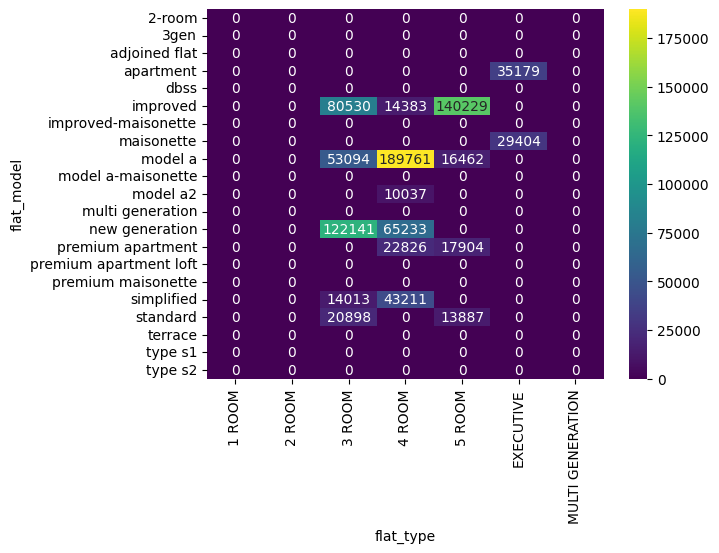

In [38]:
sns.heatmap(df.groupby(['flat_model', 'flat_type']).size().unstack(), cmap='viridis', annot=True, fmt='d')

1970s 1 ROOM


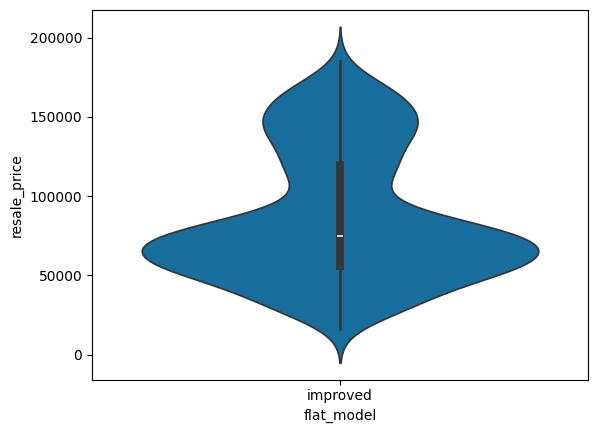

1960s 1 ROOM


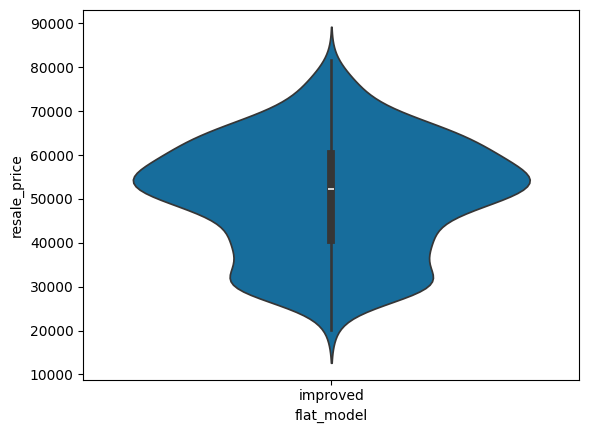

1970s 2 ROOM


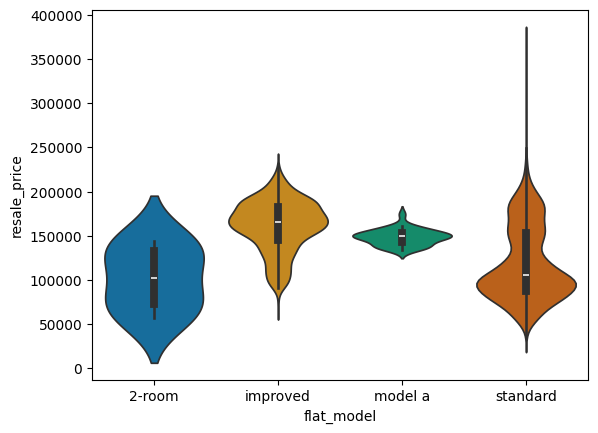

1980s 2 ROOM


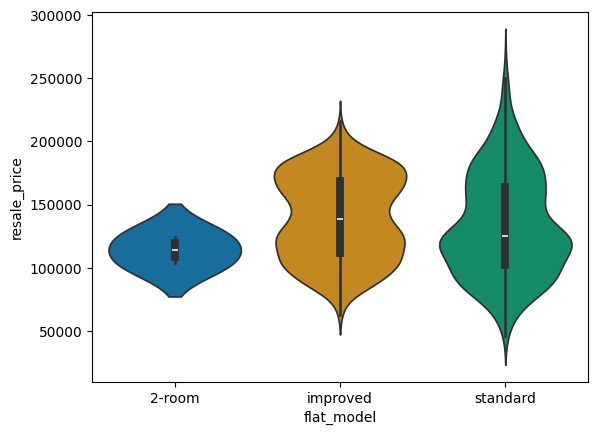

1960s 2 ROOM


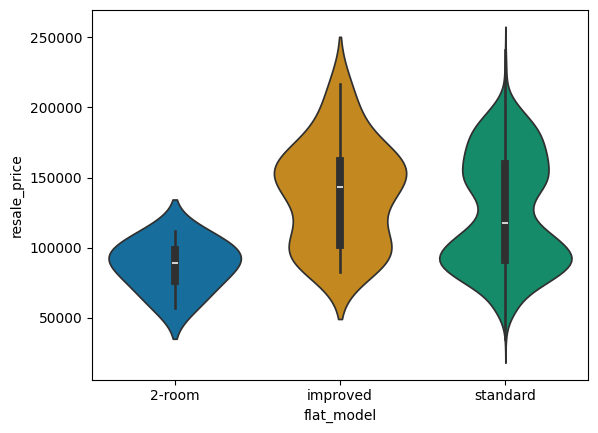

1990s 2 ROOM


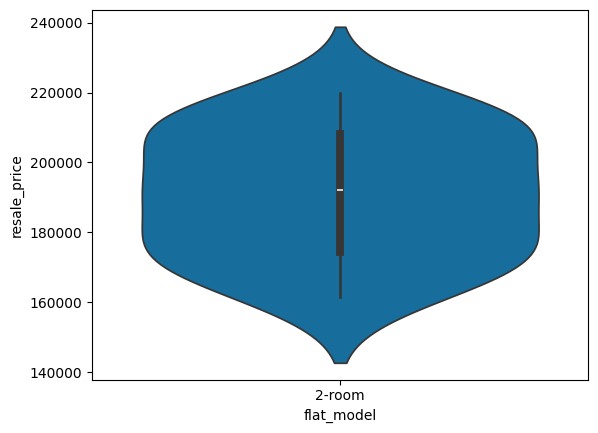

2000s 2 ROOM


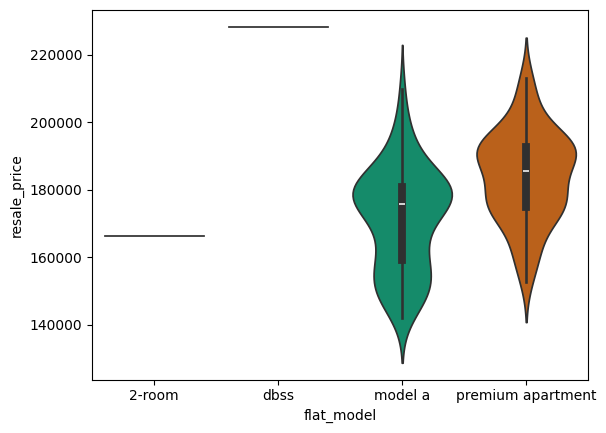

2010s 2 ROOM


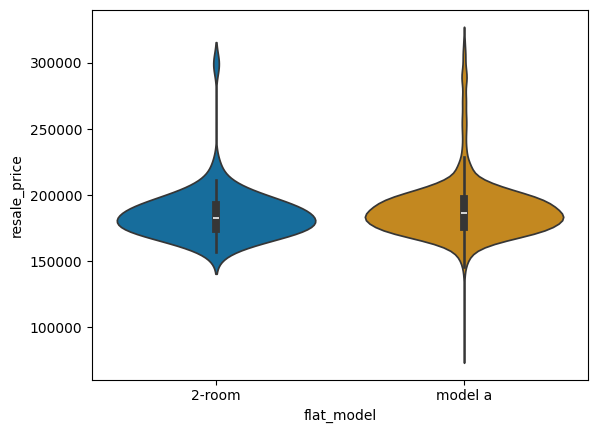

2020s 2 ROOM


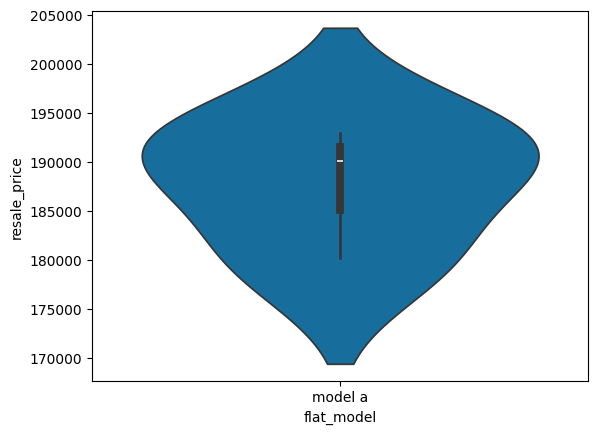

1970s 3 ROOM


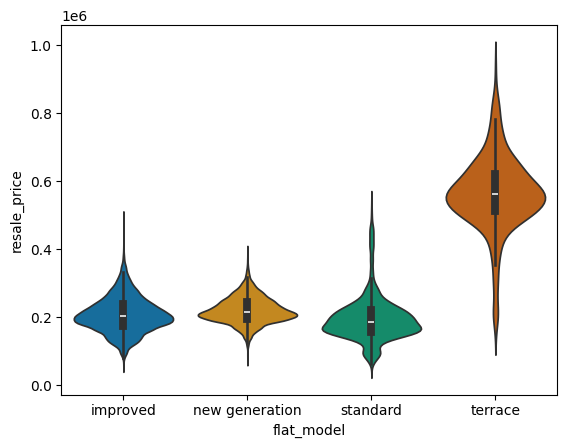

1980s 3 ROOM


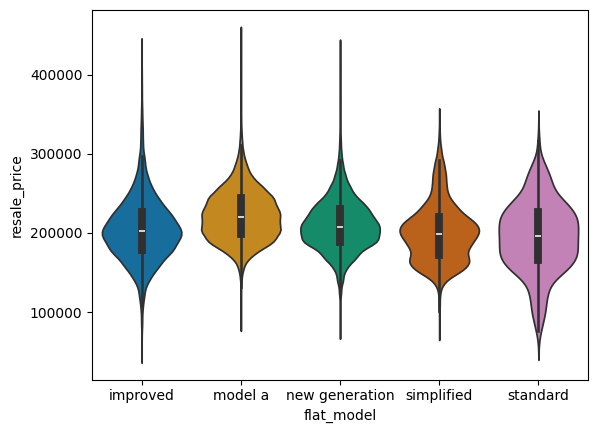

1960s 3 ROOM


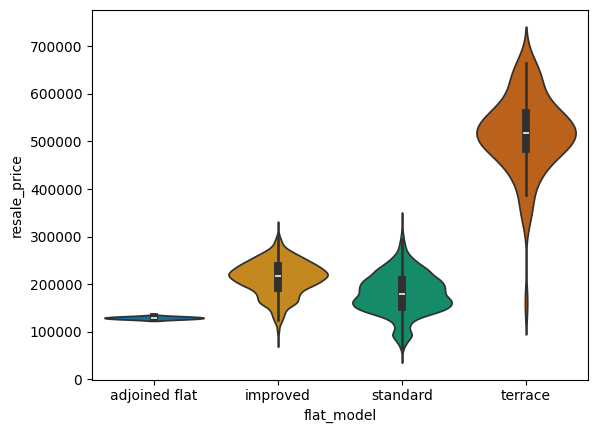

1990s 3 ROOM


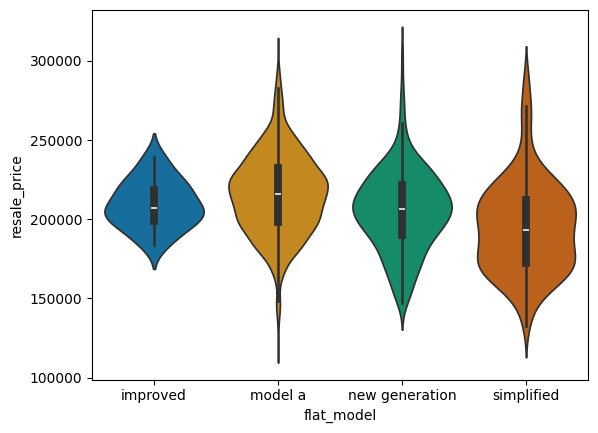

2000s 3 ROOM


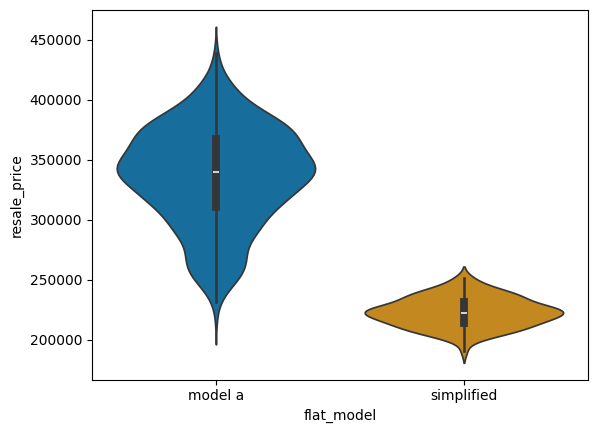

2010s 3 ROOM


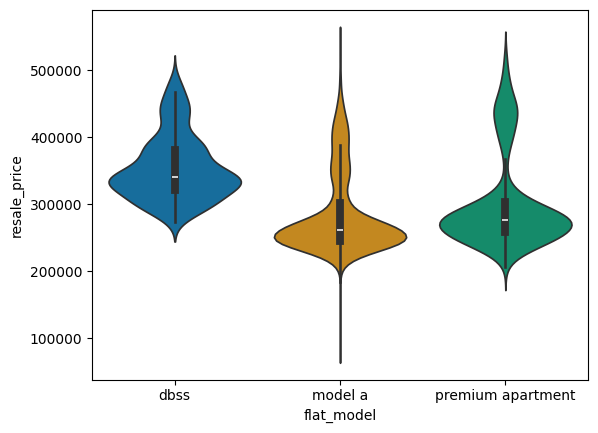

2020s 3 ROOM


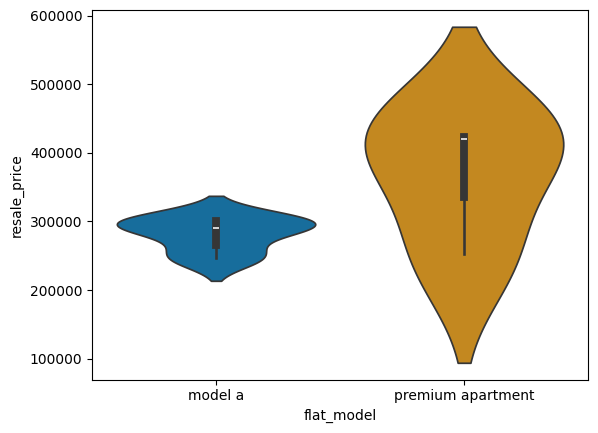

1970s 4 ROOM


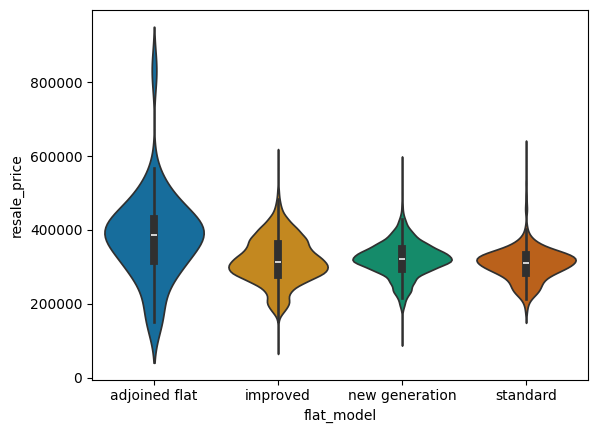

1980s 4 ROOM


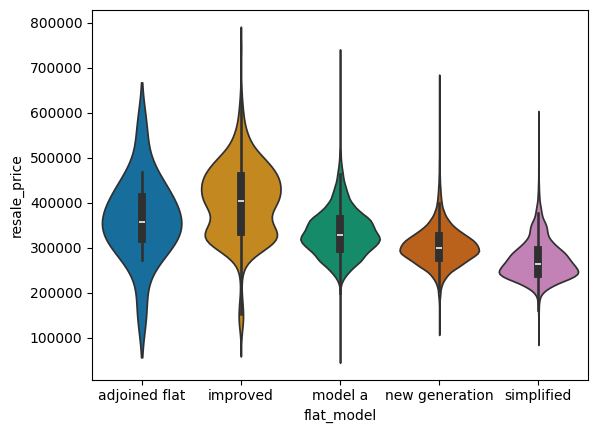

1960s 4 ROOM


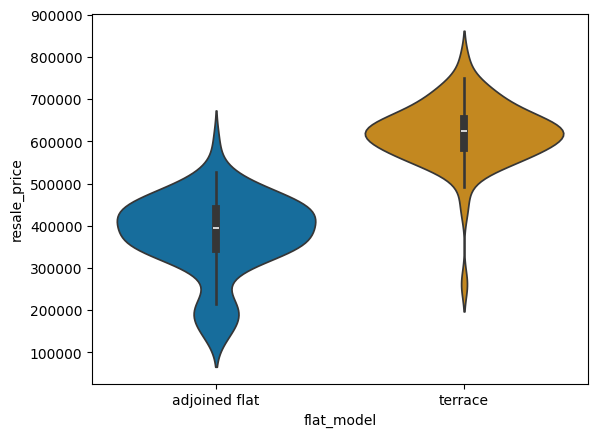

1990s 4 ROOM


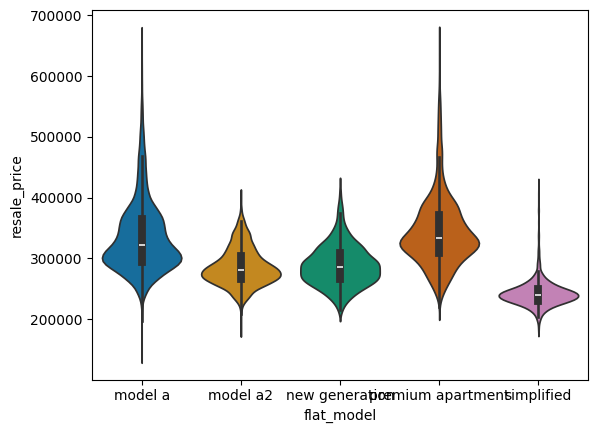

2000s 4 ROOM


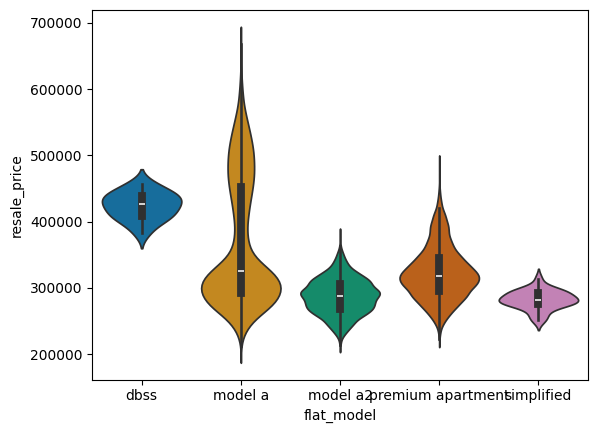

2010s 4 ROOM


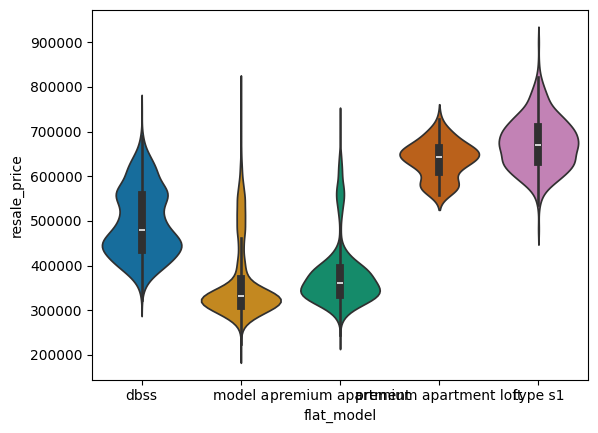

2020s 4 ROOM


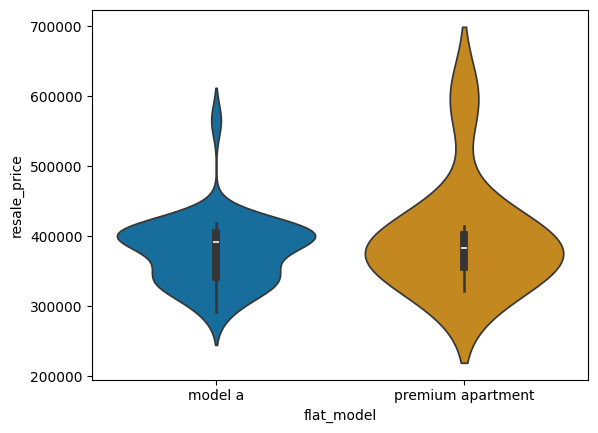

1970s 5 ROOM


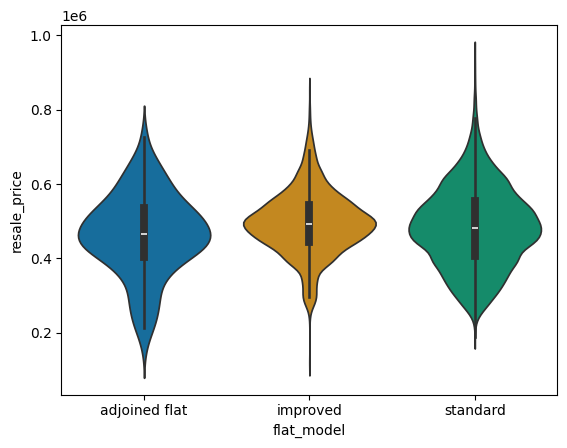

1980s 5 ROOM


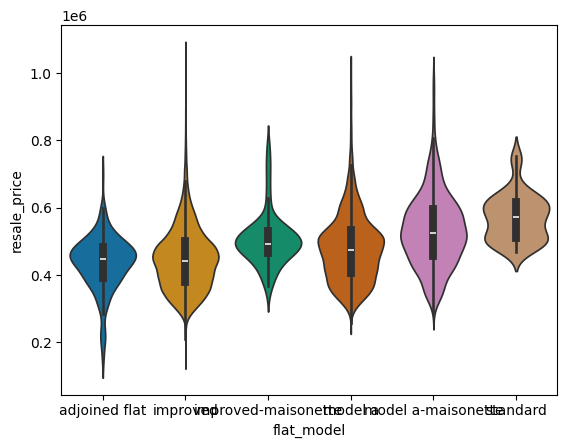

1960s 5 ROOM


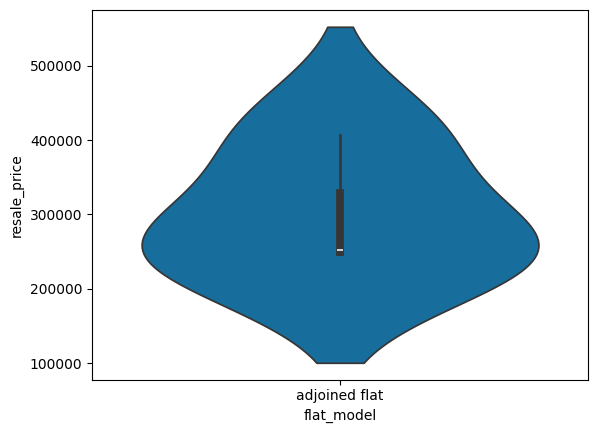

1990s 5 ROOM


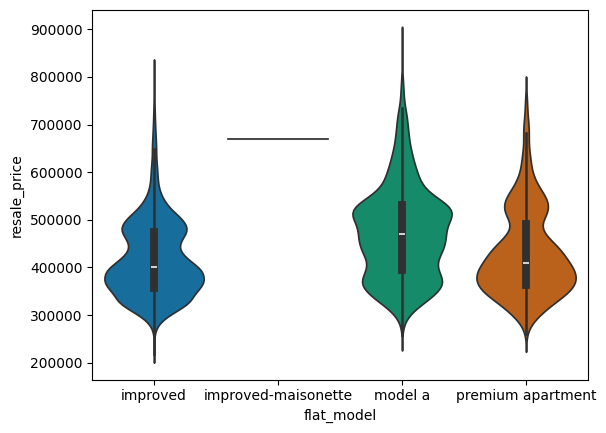

2000s 5 ROOM


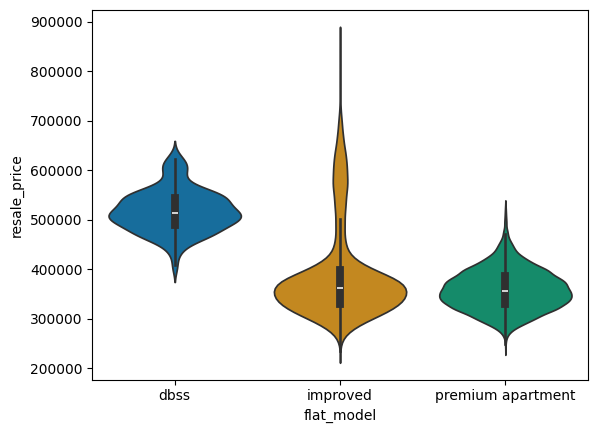

2010s 5 ROOM


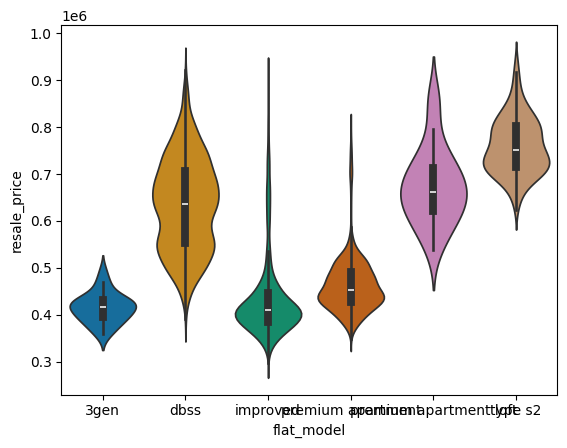

2020s 5 ROOM


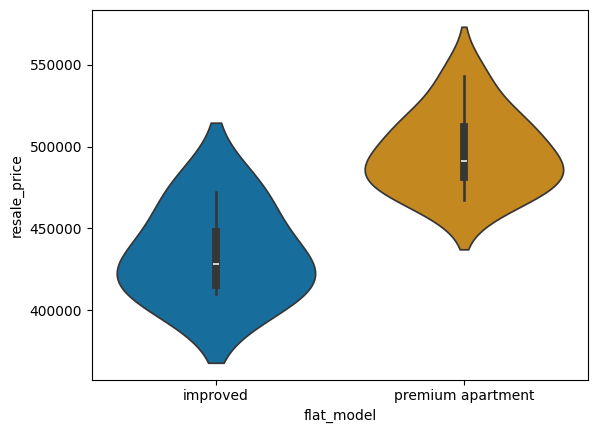

1970s EXECUTIVE


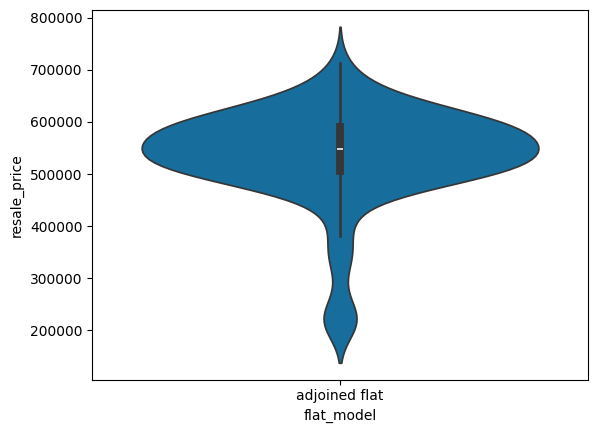

1980s EXECUTIVE


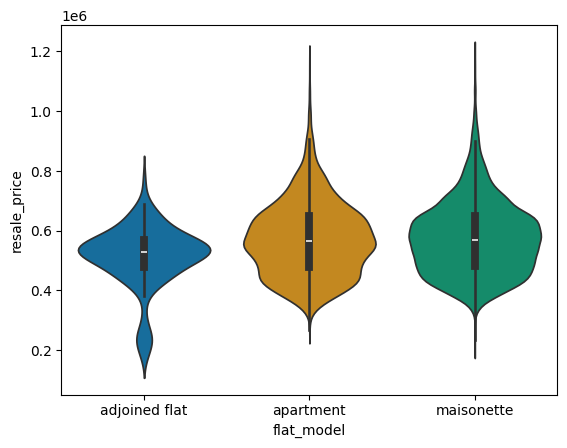

1990s EXECUTIVE


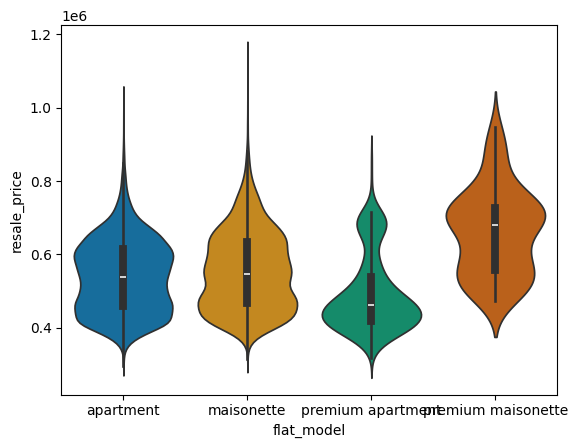

2000s EXECUTIVE


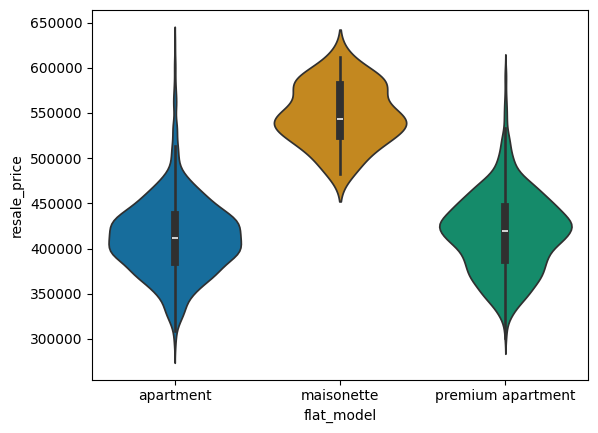

1980s MULTI GENERATION


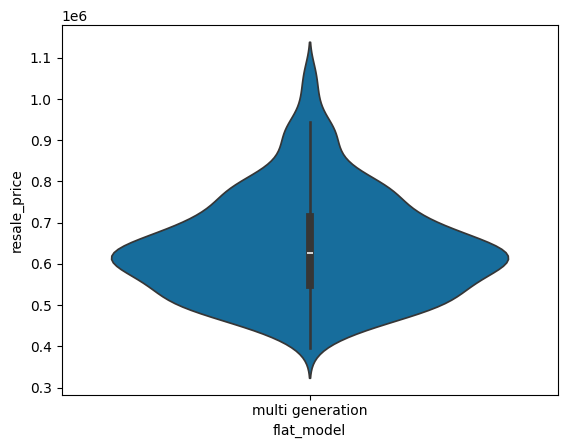

In [49]:
from itertools import product

flat_types = df['flat_type'].unique()
decades = df['decade'].unique()

df.sort_values(by=['flat_type','decade'], inplace=True)
sns.set_palette('colorblind')
for flat_type, decade in product(flat_types, decades):
    sub_df = df[(df['flat_type']==flat_type) & (df['decade']==decade)]
    if not sub_df.empty:  # Check if the subset DataFrame is not empty
        sub_df.loc[:,'flat_model'] = sub_df['flat_model'].cat.remove_unused_categories()
        # plot = sns.jointplot(x='floor_area_sqm', y='resale_price', kind='hex', data=sub_df)
        plot = sns.violinplot(x='flat_model', y='resale_price', hue='flat_model', data=sub_df)
        # plot.ax_joint.legend(loc='upper right', bbox_to_anchor=(1, 1))
        print(f"{str(decade)}s {str(flat_type)}")
        plt.show()

C:\Users\hurry\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\hurry\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


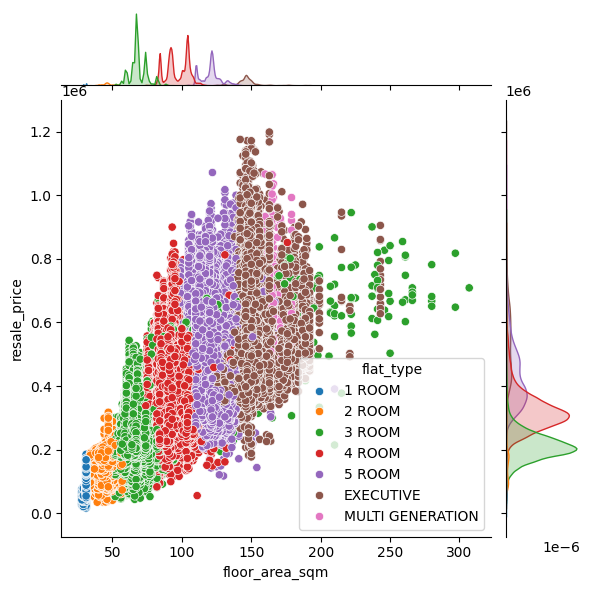

In [92]:
flat_types = df['flat_type'].unique()
for flat_type in flat_types:
    sns.jointplot(x='floor_area_sqm', y='resale_price', hue='flat_type', data=df)

## resale_price

Skew: 0.9872924998796199
Kurtosis: 1.1918729009726645
Skew: -0.19083598327463674
Kurtosis: 0.5433007498791071
Skew: 0.005227103972802157
Kurtosis: 0.23650678307193695


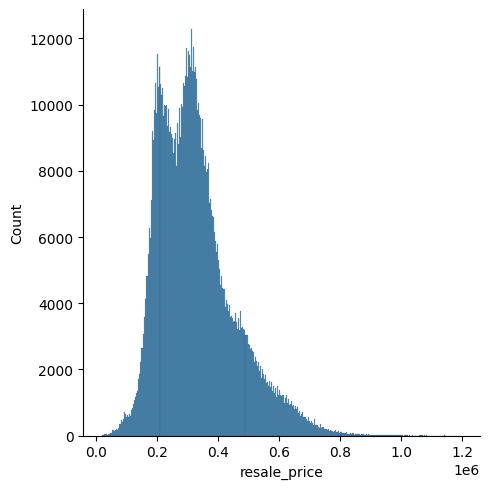

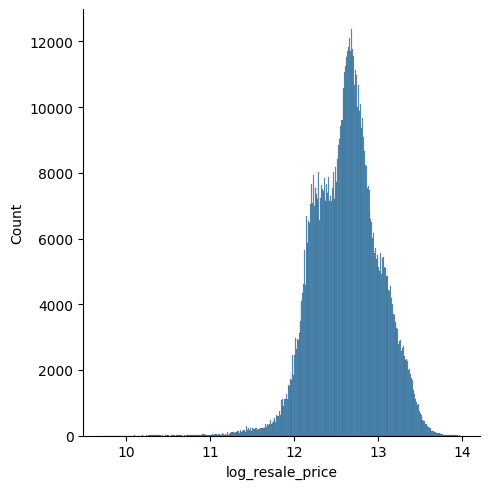

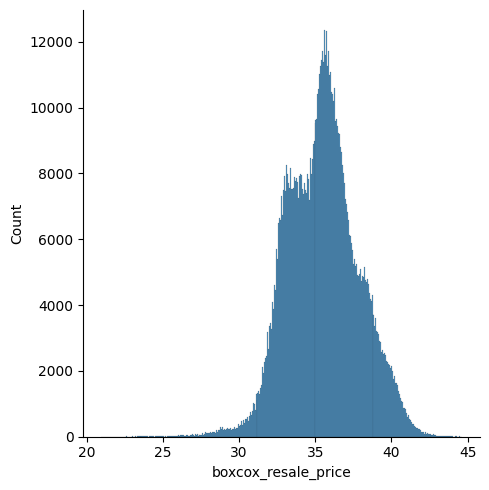

In [6]:
# Check for normal distribution of target variable
sns.displot(df['resale_price'])

# Check for skewness and kurtosis
# Skewness measures the degree to which your data is lopsided compared to a normal distribution (which is symmetrical).
# Positive Skew: Your data has a longer tail on the right side. This means there are more frequent lower values and less frequent, but potentially extreme, high values.
# Negative Skew: Your data has a longer tail on the left side. This indicates more frequent higher values and less frequent, but potentially extreme, low values.
# Symmetrical: Your data is normally distributed. Value of 0
print(f"Skew: {df['resale_price'].skew()}")
# Kurtosis measures how 'peaked' the distribution is and how heavy or light the tails are. This is done in comparison to a normal distribution.
# Leptokurtic: A distribution with a higher peak and heavier tails than a normal distribution. This implies more values clustered around the mean and more potential for outliers. >3
# Platykurtic: A distribution with a lower peak and lighter tails than a normal distribution. This indicates a wider spread of data with fewer outliers. <3
# Mesokurtic: A distribution similar in shape to a normal distribution. Value of 3
print(f"Kurtosis: {df['resale_price'].kurt()}")

# Log transformation
df['log_resale_price'] = np.log(df['resale_price'])
sns.displot(df['log_resale_price'])

# Check for skewness and kurtosis
print(f"Skew: {df['log_resale_price'].skew()}")
print(f"Kurtosis: {df['log_resale_price'].kurt()}")

# Box-Cox transformation
df['boxcox_resale_price'], lmbda = boxcox(df['resale_price'])
sns.displot(df['boxcox_resale_price'])

# Check for skewness and kurtosis
print(f"Skew: {df['boxcox_resale_price'].skew()}")
print(f"Kurtosis: {df['boxcox_resale_price'].kurt()}")


<Axes: xlabel='resale_price', ylabel='Count'>

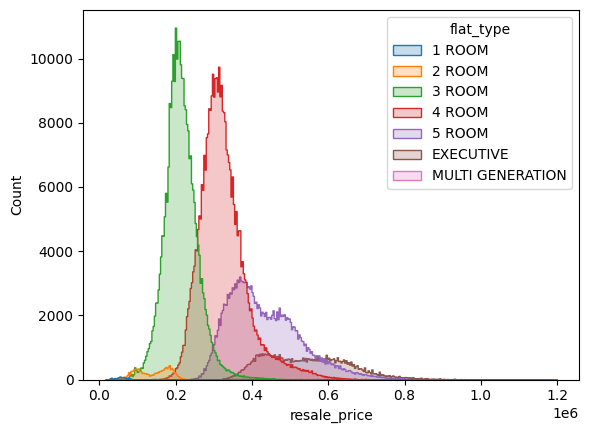

In [16]:
### Investigate the 2 peaks. Plot a ridge plot of resale price against flat_type
sns.histplot(df, x='resale_price', hue='flat_type', element='step', fill=True, common_norm=False)

In [65]:
# for each flat type, investigate the correlation heatmap
flat_types = df['flat_type'].unique()
for flat_type in flat_types:
    flat_type_df = df[df['flat_type'] == flat_type]
    corr = flat_type_df.select_dtypes(include=['number']).corr()
    sns.heatmap(corr, annot=True)
    plt.title(f'Correlation Heatmap for {flat_type}')
    plt.show()
    print(flat_type_df['flat_model'].value_counts())
    print(flat_type_df['town'].value_counts())

KeyboardInterrupt: 

## remaining_lease

In [10]:
# Compare the data for those with remaining lease 94 years and below and those above 94 years
df_94 = df[df['remaining_lease'] <= 94]
df_95 = df[df['remaining_lease'] > 94]

Skew: 1.0282943070782202
Kurtosis: 1.3165538516471287


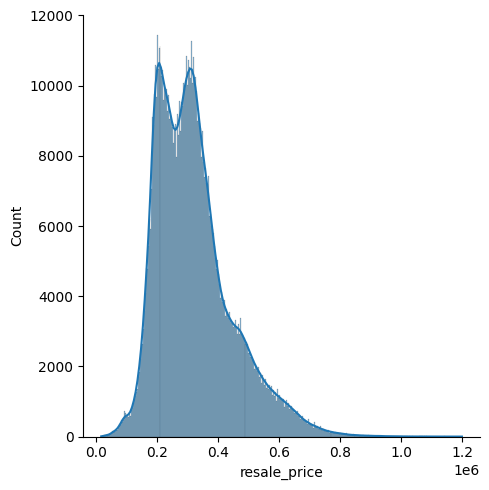

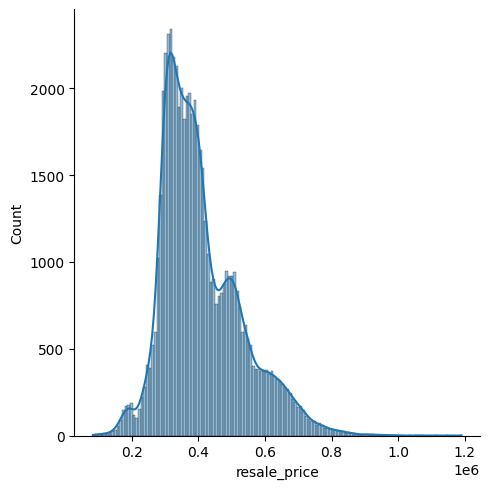

Skew: 0.9538173072776903
Kurtosis: 0.9929617560950645


In [13]:
sns.displot(df_94['resale_price'], kde=True)
plt.show()
print(f"Skew: {df_94['resale_price'].skew()}")
print(f"Kurtosis: {df_94['resale_price'].kurtosis()}")

sns.displot(df_95['resale_price'], kde=True)
plt.show()
print(f"Skew: {df_95['resale_price'].skew()}")
print(f"Kurtosis: {df_95['resale_price'].kurtosis()}")

# LinearRegression()

In [85]:
import importlib
from src import model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

importlib.reload(model)

<module 'src.model' from 'c:\\Users\\hurry\\Documents\\Github\\HDB_Resale_Price\\src\\model.py'>

## Build individual models by flat_type


1 ROOM
Before filtering: 1291
After filtering: 1291
Chosen features: ['floor_area_sqm', 'remaining_lease', 'storey', 'town', 'flat_model']
5
5
(1032, 6)
Training model: RandomForestRegressor(max_depth=8, verbose=1)
Train score: 0.94
Test score: 0.94
train_model executed in 0.18 seconds 

R2: 0.94
MSE: 91,943,401.31
RMSE: 9,588.71


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


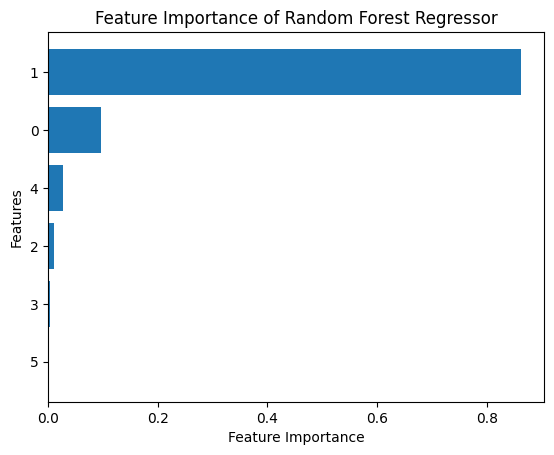

evaluate_model executed in 0.09 seconds 

2 ROOM
Before filtering: 11531
After filtering: 9645
Chosen features: ['floor_area_sqm', 'remaining_lease', 'storey', 'town', 'flat_model']
5
5
(7716, 30)
Training model: RandomForestRegressor(max_depth=8, verbose=1)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Train score: 0.86
Test score: 0.84
train_model executed in 3.06 seconds 

R2: 0.84
MSE: 284,562,461.09
RMSE: 16,868.98


IndexError: index 11 is out of bounds for axis 0 with size 1

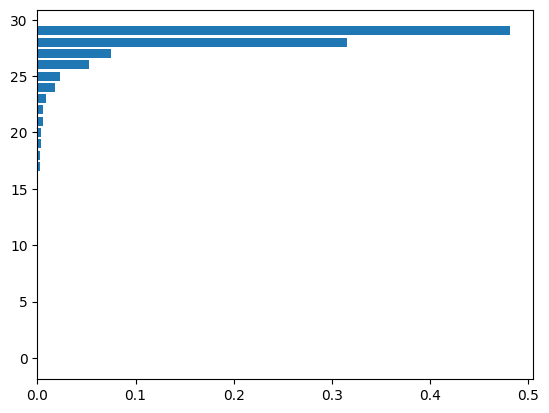

In [86]:
for flat_type in df['flat_type'].unique():
    print(flat_type)
    flat_type_df = df[df['flat_type'] == flat_type]
    print(f"Before filtering: {len(flat_type_df)}")
    df_filtered = flat_type_df.groupby(['flat_model', 'town', 'street_name', 'block'], observed=True).filter(lambda x: len(x) >= 20)
    print(f"After filtering: {len(df_filtered)}")
    chosen_features = ['floor_area_sqm', 'remaining_lease', 'storey',
                    'town',
                    'flat_model',
                    # 'street_name'
                    # 'log_floor_area_sqm', 'log_remaining_lease', 'log_storey',
                    # 'squared_floor_area_sqm', 'squared_remaining_lease', 'squared_storey'
    ]

    y_test, y_pred, rfmodel, X_train = model.train_model(df_filtered, 'resale_price', chosen_features, RandomForestRegressor(max_depth=8, verbose=1), preprocess=True)
    model.evaluate_model(y_test, y_pred, rfmodel, X_train, 'tree')


## Linearity

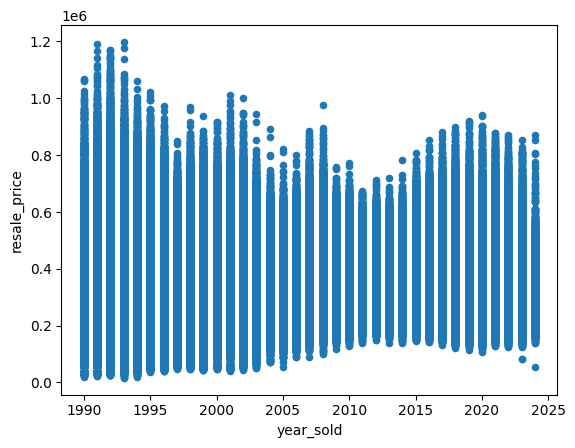

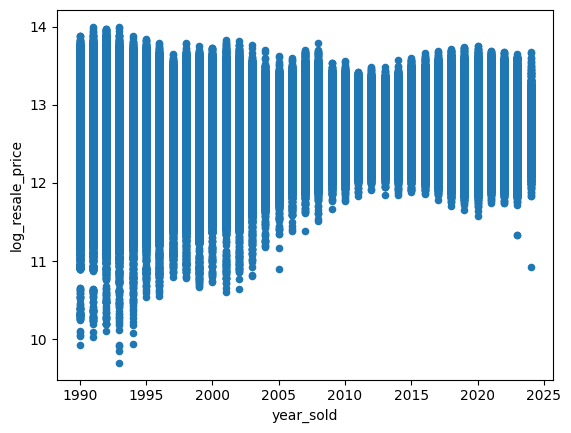

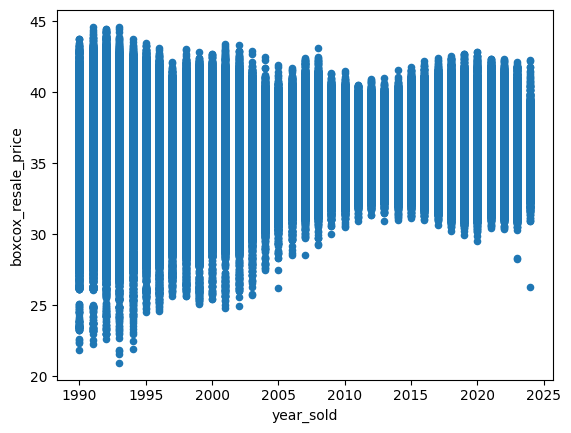

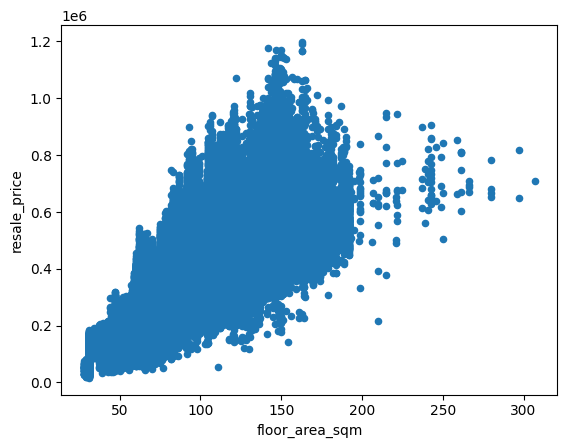

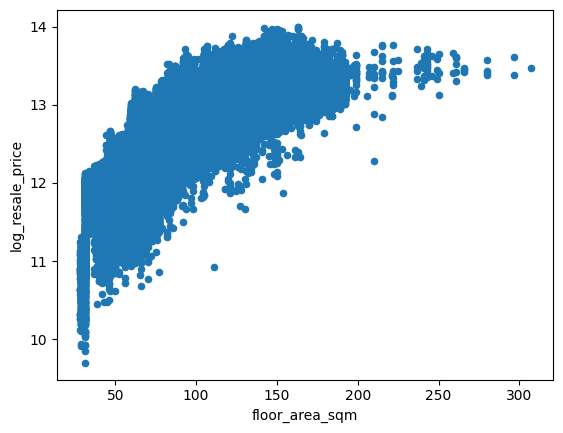

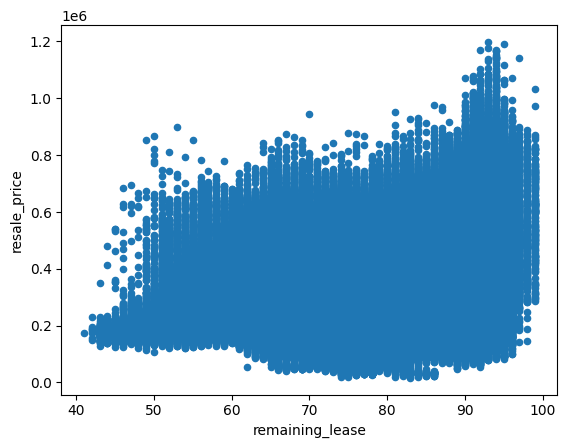

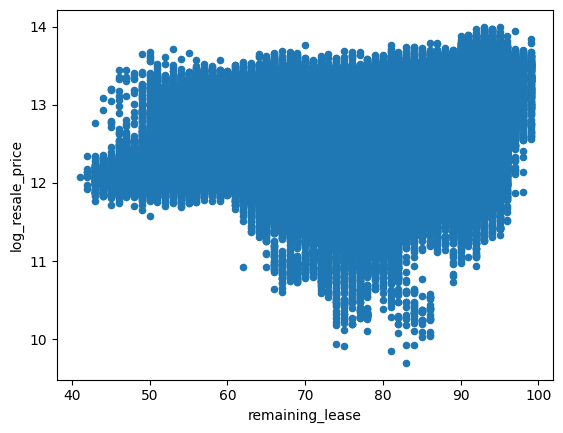

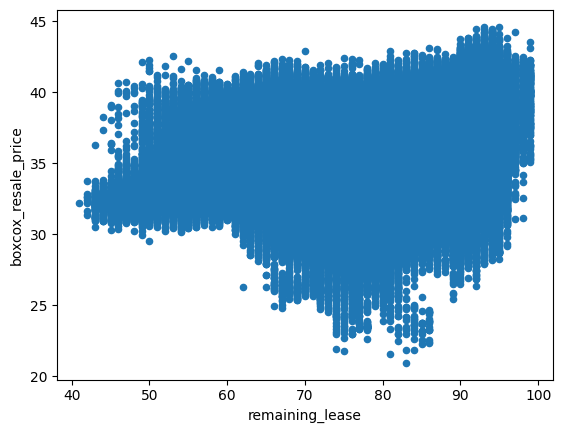

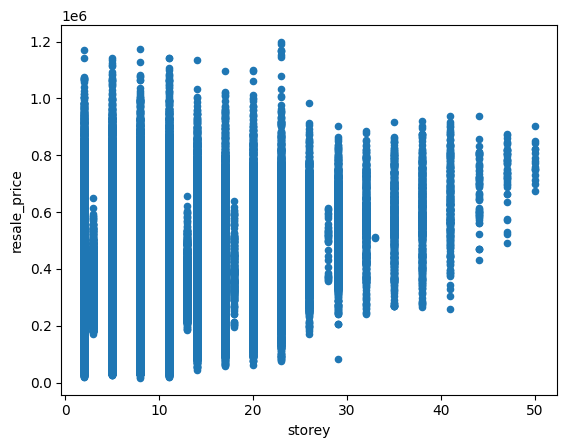

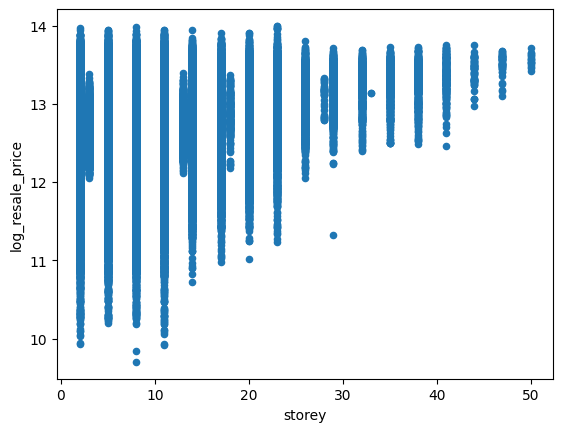

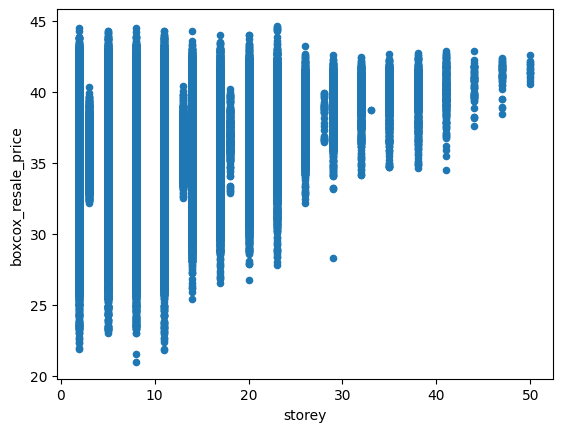

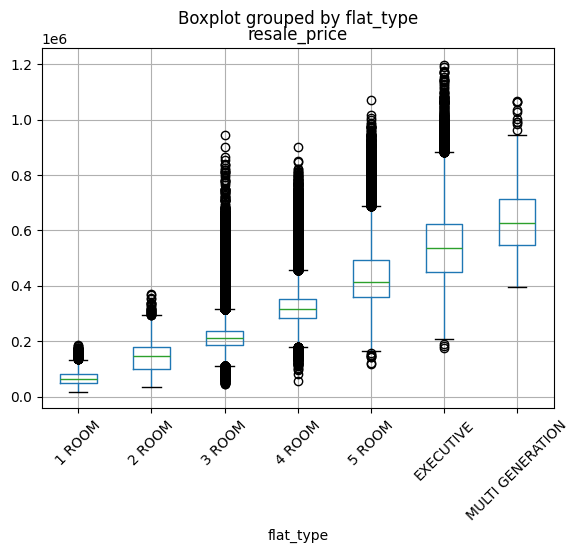

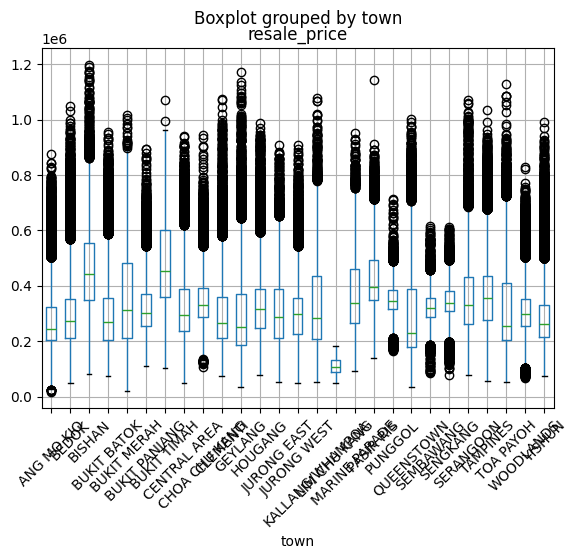

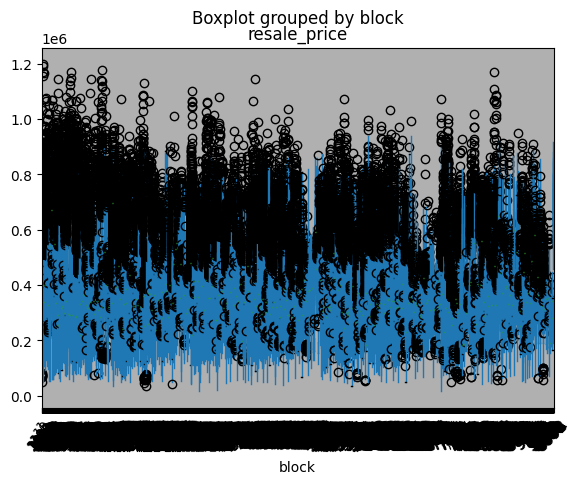

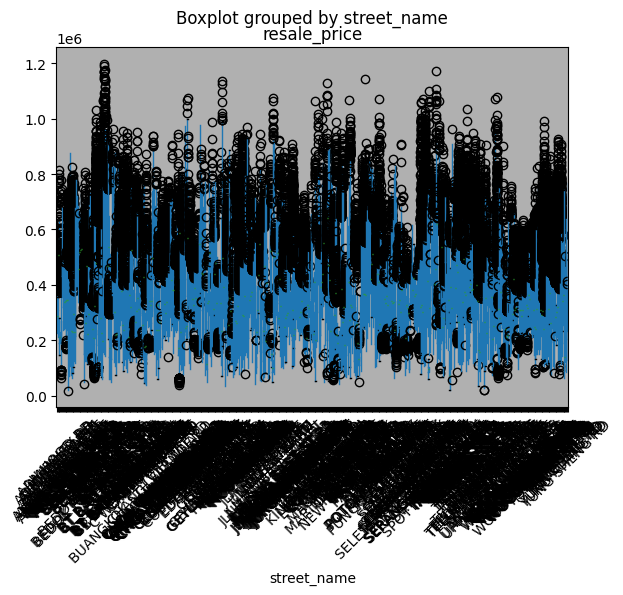

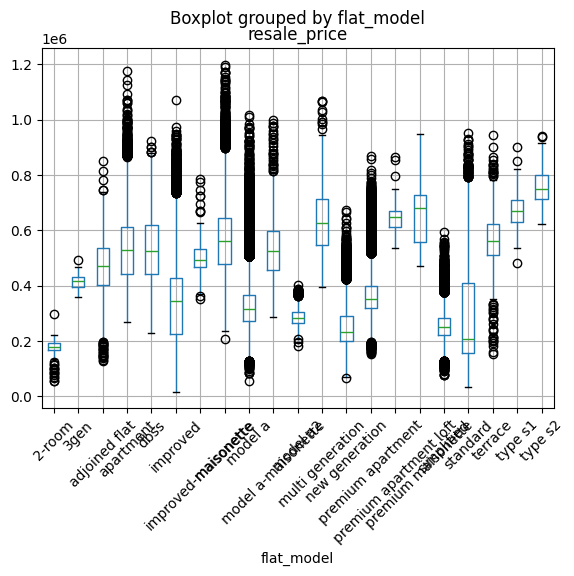

In [10]:
# Check for linearity of factors
y_variable = 'resale_price'
y_log_variable = 'log_resale_price'
y_boxcox_variable = 'boxcox_resale_price'
y_variables = [y_variable, y_log_variable, y_boxcox_variable]

def scatter_plot(df, x_variable, y_variable):
    if x_variable not in y_variables:
        df.plot.scatter(x=x_variable, y=y_variable)

def boxplot_sorted(df, categorical_variable, y_variable):
    sorted_idx = df.groupby(categorical_variable)[y_variable].median().sort_values().index
    sorted_df = df.set_index(categorical_variable).loc[sorted_idx].reset_index()
    sorted_df.boxplot(column=y_variable, by=categorical_variable)
    plt.xticks(rotation=45)

# Scatter plot
numerical_variables = df.select_dtypes(include=['number']).columns
scatter_plots = [(x_var, y_var) for x_var in numerical_variables for y_var in y_variables if x_var != y_var]
for x_var, y_var in scatter_plots:
    scatter_plot(df, x_var, y_var)

# Boxplot
categorical_variables = df.select_dtypes(include=['object']).columns
for categorical_variable in categorical_variables:
    if categorical_variable != y_variable:
        boxplot_sorted(df, categorical_variable, y_variable)


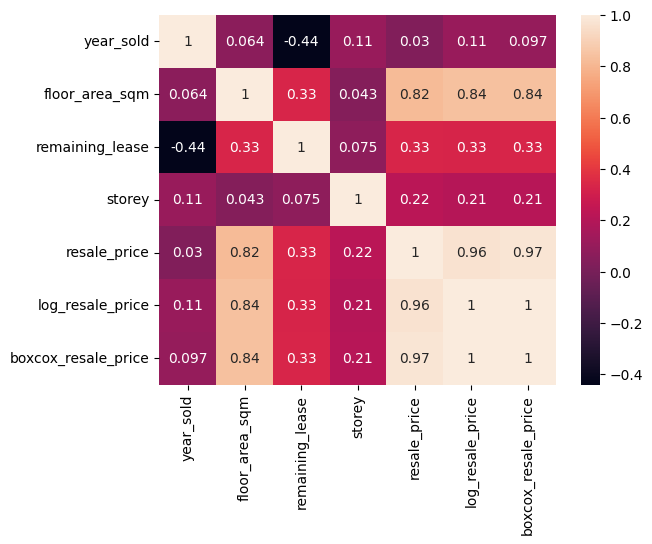

variable    VIF
0            const  61.78
1  remaining_lease   1.13
2   floor_area_sqm   1.13
3           storey   1.01

In [ ]:
# check for multicollinearity
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# The Variance Inflation Factor (VIF) is a metric that measures how much the variance of an estimated regression coefficient increases due to multicollinearity in a multiple regression model.
# How it works:
# Single Factor Regression: Consider regressing one of your independent variables against all other independent variables in your model.
# R-squared Value:  Get the R-squared value from this regression.
# Calculation: The VIF for that independent variable is calculated as: VIF = 1 / (1 - R-squared)
# Ideal Value: A VIF of 1 indicates no correlation between a given independent variable and the other predictors.
# Caution: VIF values of 5 or above suggest potential multicollinearity issues.
# Severe: A VIF of 10 or higher is generally considered a serious cause for concern.
X = add_constant(df[['remaining_lease', 'floor_area_sqm', 'storey']].select_dtypes(include='number'))
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values('VIF', ascending=False)
vif['VIF'] = vif['VIF'].apply(lambda x: '{:.2f}'.format(x))
vif

In [9]:
from sklearn.ensemble import RandomForestRegressor

chosen_features = ['floor_area_sqm', 'remaining_lease', 'storey',
                   'flat_type',
                   'town',
                  #  'flat_model',
]

y_test, y_pred = model.train_model(df, 'resale_price', chosen_features, RandomForestRegressor(verbose=2))
model.evaluate_model(y_test, y_pred)

Chosen features: ['floor_area_sqm', 'remaining_lease', 'storey', 'flat_type', 'town']
Training model: RandomForestRegressor(verbose=2)
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100


Chosen features: ['floor_area_sqm', 'remaining_lease', 'storey', 'flat_type', 'town']
Training model: LinearRegression()
Test score: 0.82
fit_model executed in 0.93 seconds 

train_model executed in 2.15 seconds 

R2: 0.82
MSE: 2,903,868,250.75
RMSE: 53,887.55


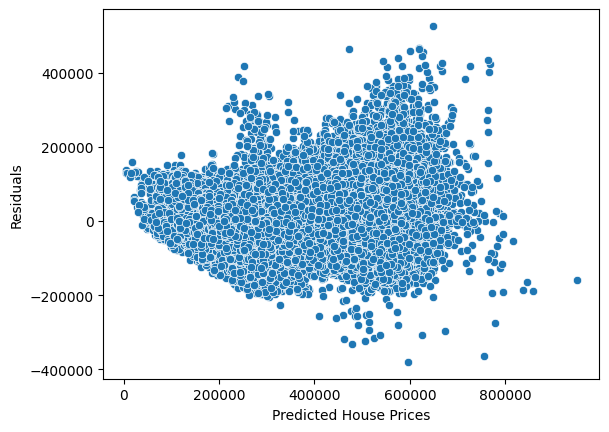

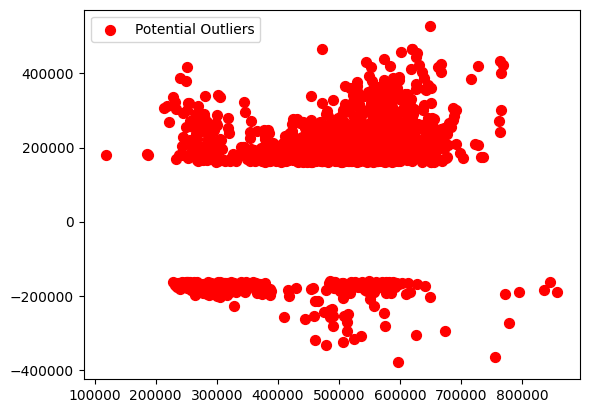

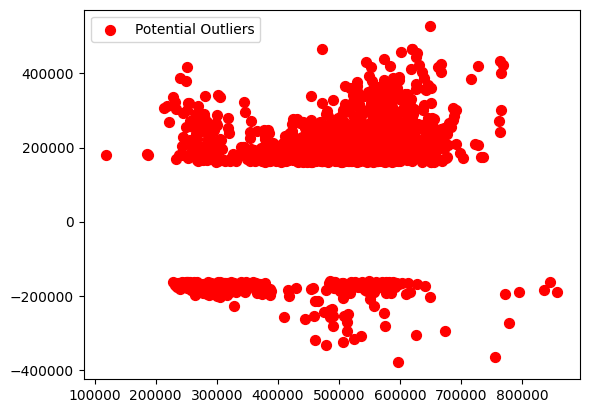

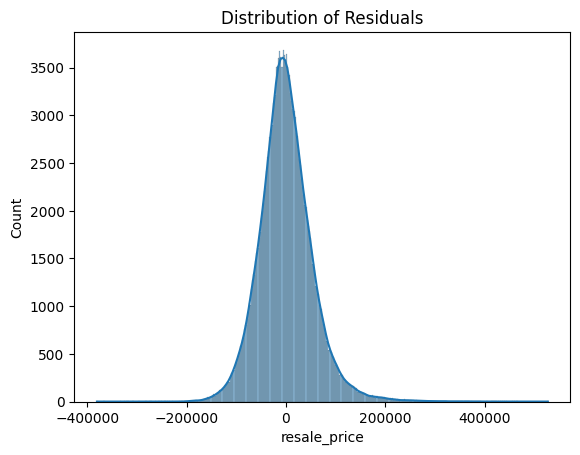

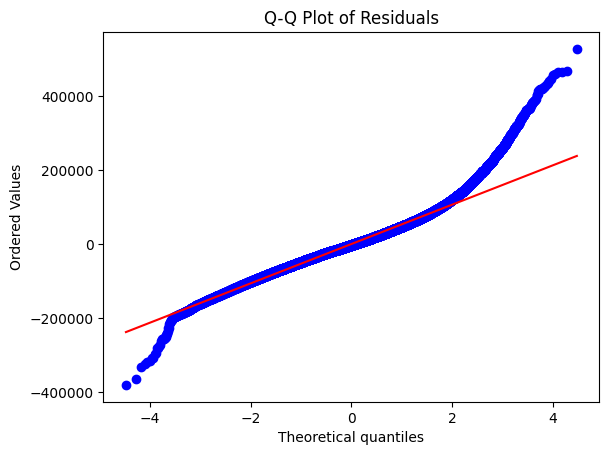

evaluate_model executed in 3.03 seconds 

Chosen features: ['floor_area_sqm', 'remaining_lease', 'storey', 'flat_type', 'town']
Training model: LinearRegression()
Test score: 0.83
fit_model executed in 0.97 seconds 

train_model executed in 2.14 seconds 

R2: 0.83
MSE: 2,675,359,794.96
RMSE: 51,723.88


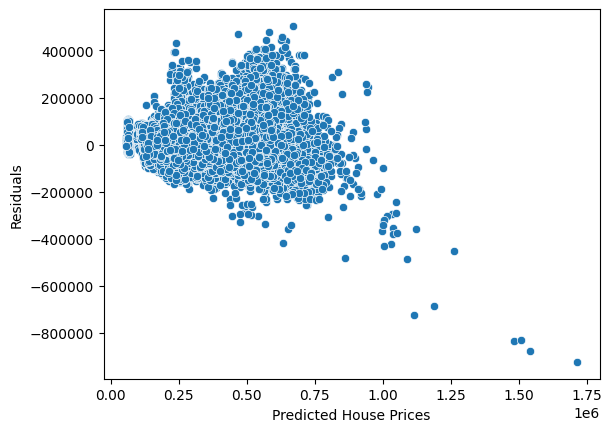

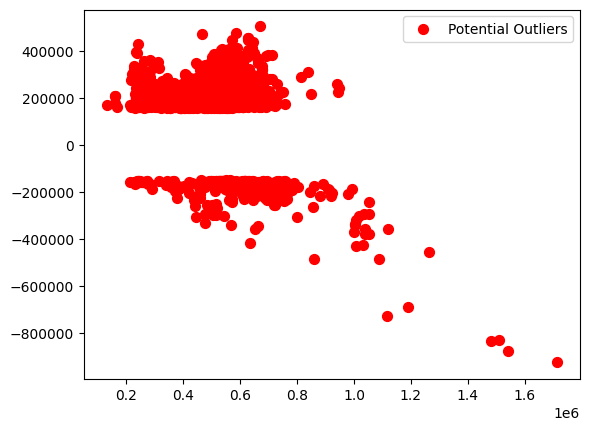

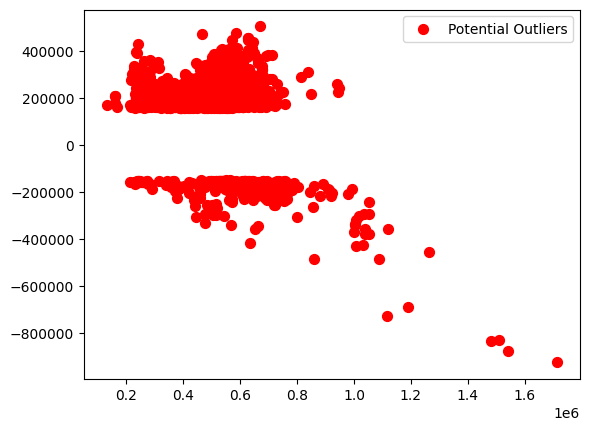

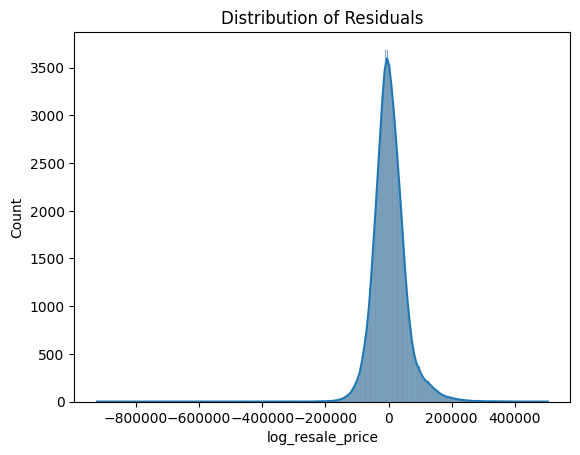

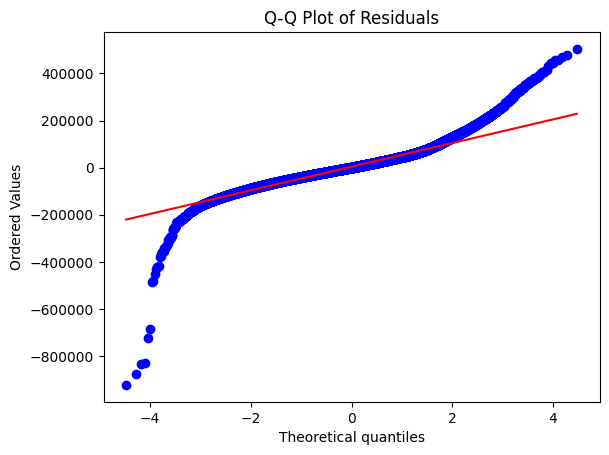

evaluate_model executed in 2.97 seconds 

Chosen features: ['floor_area_sqm', 'remaining_lease', 'storey', 'flat_type', 'town']
Training model: LinearRegression()
Test score: 0.83
fit_model executed in 0.91 seconds 

train_model executed in 2.01 seconds 

R2: 0.84
MSE: 2,647,498,704.42
RMSE: 51,453.85


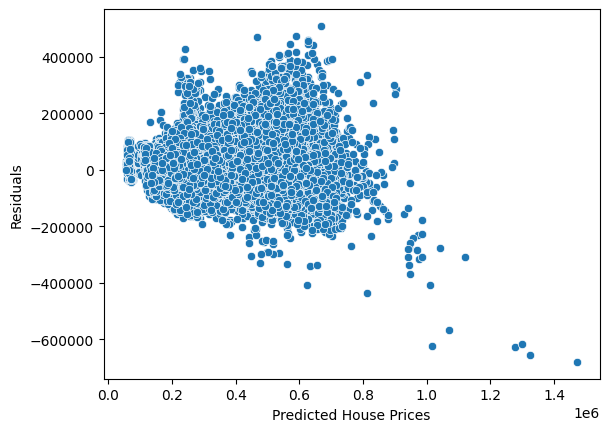

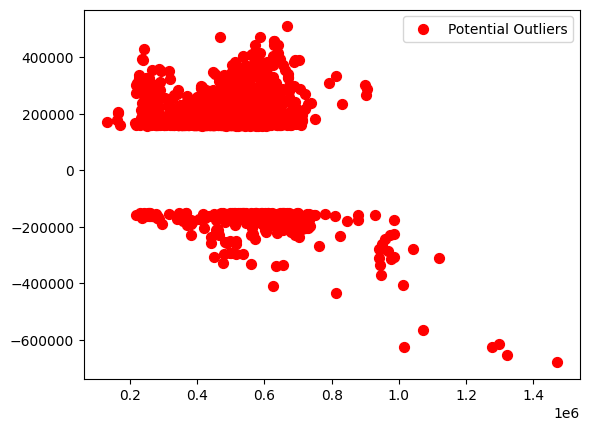

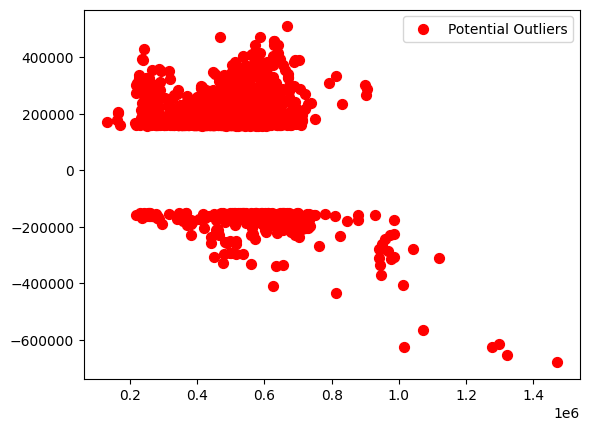

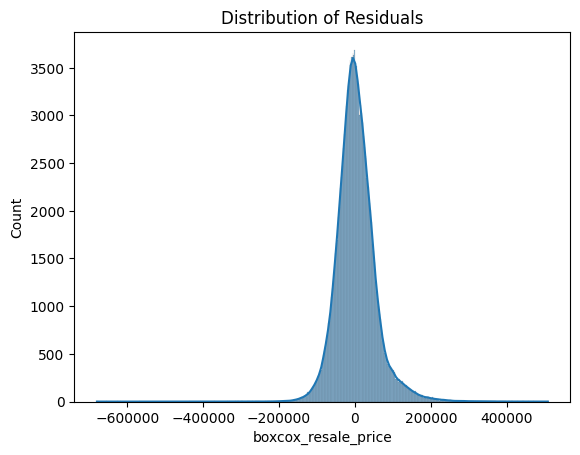

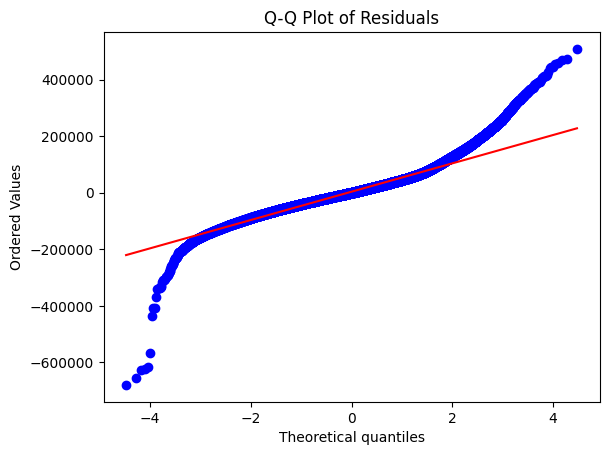

evaluate_model executed in 2.93 seconds 



In [12]:
from sklearn.linear_model import LinearRegression

# Simple Linear Regression
chosen_features = ['floor_area_sqm', 'remaining_lease', 'storey',
                   'flat_type',
                   'town',
                  #  'flat_model',
]

# Using normal resale price
y_test, y_pred = model.train_model(df, 'resale_price', chosen_features, LinearRegression())
model.evaluate_model(y_test, y_pred)

# Using log transformed resale price
y_test, y_pred = model.train_model(df, 'log_resale_price', chosen_features, LinearRegression())
y_test = np.exp(y_test)
y_pred = np.exp(y_pred)
model.evaluate_model(y_test, y_pred)

# Using boxcox transformed resale price
y_test, y_pred = model.train_model(df, 'boxcox_resale_price', chosen_features, LinearRegression())
y_test = inv_boxcox(y_test, lmbda)
y_pred = inv_boxcox(y_pred, lmbda)
model.evaluate_model(y_test, y_pred)

## Independence of Residuals

## Normality of residuals

## Equal variance (Homescedascity)